# [Detecting Deceptive Speech: A Machine Learning Approach to Truthfulness Prediction in Narrated Stories]

# 1 Author

**Student Name**: Yutong Na

**Student ID**: 240833840

# 2 Problem formulation

The aim of this project is to develop a machine learning model that predicts whether a 30-second narrated story is true or deceptive. This problem is particularly interesting due to its implications for fields like speech processing, behavioral psychology, and digital forensics, where the ability to automatically identify deceptive speech patterns has significant practical value. The challenges lie in working with a small dataset, selecting appropriate machine learning models, and extracting meaningful audio features that can capture subtleties in speech patterns indicative of truthfulness or deception.

# 3 Methodology  

## 3.1 Training Task  

The training task focuses on developing models to predict the binary label (`true_story` or `deceptive_story`) based on acoustic features such as power, pitch, and voice frequency.  

### Model Selection  

Random Forest was selected as the primary model due to its robustness in handling complex relationships between features and its ability to rank feature importance, making it suitable for exploratory studies. For comparison, Support Vector Machines (SVM) and LightGBM (LGBM) were also implemented. SVM is effective for high-dimensional data, while LGBM offers computational efficiency and strong performance with structured datasets. This diverse set of models ensures a comprehensive evaluation.  

## 3.2 Validation Task  

The validation task assesses the generalization ability of the models using an independent validation set. Performance is evaluated with metrics such as accuracy, ROC-AUC, precision, recall, F1-score, and confusion matrix analysis, providing a thorough understanding of the models' strengths and limitations.  

## 3.3 Model Performance Metrics  

1. **Accuracy:** Reflects the overall effectiveness of the model.  
2. **Precision, Recall, and F1-Score:**  
   - **Precision:** Proportion of true positives among all positive predictions.  
   - **Recall:** Ability to capture all relevant positive instances.  
   - **F1-Score:** Balances precision and recall.  
3. **ROC-AUC:** Highlights the discriminative capability of the model.  
4. **Confusion Matrix:** Breaks down predictions into true positives, false positives, true negatives, and false negatives.  

## 3.4 Feature Selection and Overfitting Analysis  

To investigate the impact of feature selection, models were re-trained without linguistic features. However, overfitting persisted, with performance remaining below random guessing (50% accuracy). Further experiments using mock data—randomly generated numeric inputs—produced similar outcomes, demonstrating that the extracted acoustic features had no meaningful correlation with the labels.  

The primary cause of overfitting was the lack of a meaningful relationship between the features and the labels (`true` or `deceptive`). For a small dataset, high-complexity models such as Random Forest and LightGBM tended to overfit by memorizing the training data rather than learning generalizable patterns.  

# 4 Implemented ML prediction pipelines

The machine learning prediction pipeline is designed to classify audio samples into binary labels: (`true_story` or `deceptive_story`). The pipeline is composed of multiple interconnected stages, where the output of each stage serves as the input for the next. It begins with raw audio files and culminates in prediction results. Intermediate data structures evolve through transformations, maintaining a consistent and structured format.

Pipeline Stages and Data Flow:

1. **Input**: Raw audio files in WAV format.
2. **Transformation Stage**: Splits the dataset into training and test sets with an 75:25 ratio. Each audio file is standardized to 30-second slices to ensure uniformity in analysis. Feature extraction techniques are then applied to reduce the dimensionality of the audio data, producing structured feature matrices in formats of pandas DataFrames. These features are optimized for compatibility with machine learning models.
3. **Model Stage**: Processes the extracted feature matrices using machine learning algorithms to generate binary predictions and corresponding probability scores. Includes hyperparameter tuning to optimize model performance through techniques like GridSearchCV.
4. **Validation Stage**: Evaluates the model using metrics like accuracy, ROC AUC, and confusion matrix to ensure reliable performance on unseen data.
5. **Output**: Binary predictions (true_story or deceptive_story) accompanied by confidence scores.

Each stage is detailed further below.

## 4.1 Transformation stage

**Objective**: Extract meaningful features from raw audio data to serve as model inputs.

**Input:**

* 100 WAV format audio files (approximately 2 minutes each).
* Distribution: 78 English, 4 Hindi, 3 Arabic, 2 each (Mandarin, Marathi), 1 each (Bengali, Kannada, French, Russian, Portuguese, Spanish, Swahili, Telugu, Korean, Cantonese, Italian).
* Content: 50 true stories, 50 deceptive stories.

**Process:**

1. **Train-Validation Split (75:25)**: Given the limited dataset size, we adopt the widely-used split ratio to ensure sufficient training data while maintaining a meaningful test set. The initial step divides the raw audio files before any segmentation occurs. This strategic timing prevents data leakage by ensuring segments from the same source recording don't appear in both training and testing sets, which could lead to model confusion between story authenticity and speaker identification.

2. **Audio Segmentation**: Each recording is continuously divided into 30-second segments. For the final portion of each recording, we employ a threshold-based approach: if the remaining segment exceeds 20 seconds, we create an overlapping segment using the last 10 seconds of the previous segment; if less than 20 seconds remain, the segment is discarded. This approach maximizes the utilization of source content while maintaining segment quality and consistency.

3. **Feature Extraction**: Through related literature review, we identified four key acoustic features most indicative of speech authenticity: power, pitch mean, pitch standard deviation, and fraction of voiced region. These features are extracted from each 30-second segment.

4. **Data Preprocessing:**

    1. **Normalization**: This process standardizes all features to a common scale, eliminating variations due to different units of measurement. This standardization is crucial for optimal model performance, ensuring all features contribute proportionally to the analysis.

    2. **One-hot Encoding**: Categorical variables, such as `Language`, are encoded using `OneHotEncoder`. This converts each language into a binary column, ensuring the model can interpret language categories effectively.

    3. **Class Balancing**: Applying oversampling techniques like SMOTE to address class imbalance. Post-segmentation class distribution is adjusted to ensure equal representation of true and deceptive story segments, preventing model bias toward the more frequently occurring class.

**Output**:
The transformation stage produces two pandas DataFrames saved as train_features.csv and test_features.csv. Each row represents a 30-second audio segment, with columns containing the pre-processed acoustic features extracted from the segments.

**Intermediate Data Format**: A structured DataFrame with columns such as file_name, power, pitch_mean, pitch_std, voiced_fr, language, story_type.

## 4.2 Model stage

**Objective**: Train and predict using machine learning classifiers.

**Input**: Feature matrix from the Transformation Stage.

**Model Choices**:

* **Support Vector Machine (SVM)**

    Support Vector Machine (SVM) is chosen for its strong performance in high-dimensional audio feature spaces, though it can become computationally intensive with larger datasets. Using kernel functions like the RBF kernel, it captures non-linear relationships in speech features that may indicate deception. Its maximum margin principle ensures good generalisation on small datasets and robustness to noise, while feature importance analysis highlights key audio characteristics linked to deception.

* **Random Forest**

    Random Forest leverages ensemble learning to model non-linear interactions between features and handle outliers through its bagging approach. While feature scaling isn't required, normalized features can improve performance in certain cases. It effectively addresses imbalanced datasets with diverse sampling and provides feature importance insights.

* **LightGBM**

    LightGBM stands out for its computational efficiency and accuracy, thanks to its leaf-wise growth strategy, though this approach may lead to overfitting on smaller datasets despite early stopping mechanisms. It handles class imbalance and categorical data well, prevents overfitting with early stopping, and supports GPU acceleration for scalability. These qualities make it suitable for optimizing deception detection systems.

**Integration strategy:**

Together, these models complement each other: SVM excels at capturing complex relationships, Random Forest offers stability and interpretability, and LightGBM ensures efficiency and scalability. Comparing their performance enables a comprehensive evaluation of deception detection in 30-second speech samples, combining robust detection with insights into deceptive speech characteristics.

**Hyperparameter Tuning**: GridSearchCV optimizes parameters like n_estimators and max_depth.

**Evaluation metrics**: accuracy, precision, recall, F1-score, ROC-AUC and confusion matrix are applied to evaluate models. Detailed explanations on these metrics are given in section 3.3 Model Performance Metrics.

**Output**: Prediction results, including binary labels and confidence scores (probabilities).

**Additional Analysis**: experiments on using only numerical features and mock data to analyze the reason behind performance.

# 5 Dataset

**Dataset Description**  

The following dataset was created as an intermediate output to assist with analysis:  

1. **/content/train**  
   This folder contains 364 audio segments, each 30 seconds long, derived from 75 storytellers. The naming convention for the internal `.wav` files follows this format: `00007_segment_1.wav, 00007_segment_2.wav, 00007_segment_3.wav, 00007_segment_4.wav, 00007_segment_5_extended.wav`. This indicates five consecutive 30-second recordings from the seventh storyteller. Files with the `_extended` suffix signify that they overlap with the preceding file by up to 10 seconds. This approach aims to retain as much original content as possible by minimizing deletions, thereby increasing the size of the training dataset.  

2. **/content/test**  
   This folder contains 94 audio segments, each 30 seconds long, derived from 25 storytellers. Similarly, the internal `.wav` files follow the naming convention: `00006_segment_0.wav, 00006_segment_1.wav, 00006_segment_2.wav, 00006_segment_3_extended.wav`.  

3. **train_features.csv and test_features.csv**  
   After feature extraction was performed on `/content/train` and `/content/test`, two pandas DataFrames were generated: **train_features.csv** and **test_features.csv**. The column structure remains consistent, with features including: `power`, `pitch_mean`, `pitch_std`, `voiced_fr`, as well as metadata such as `file_name`, `language`, and `story_type`.  

These datasets are the result of dimensionality reduction, making them suitable for subsequent machine learning tasks.   

**Limitations:**  

1. **Small Sample Size:**  
   The limited dataset may restrict the model's ability to generalize to new, unseen data.  

2. **Audio Variability:**  
   Variations in recording quality, speaker accents, and vocal traits can introduce noise and affect the consistency of extracted features.  

3. **Lack of Time-Series Analysis:**  
   The current approach does not incorporate temporal information, which could capture dynamic patterns across the audio, limiting its utility for tasks such as sequential modeling.  

4. **Absence of Lexical Features:**  
   Transcripts of the audio recordings are not included, which excludes valuable lexical features. This omission reduces the model's ability to perform tasks like sentiment analysis or analyze linguistic content for deeper insights.  

5. **Limited Acoustic Features:**  
   While key features such as power, pitch, and voiced region fraction are extracted, other potentially useful acoustic features are not included. For example:  
   - **MFCC (Mel-Frequency Cepstral Coefficients):** Widely used in audio analysis, especially in convolutional neural networks (CNNs), for capturing detailed spectral information.  
   - **Emotion-Related Features:** Features indicative of emotional tone or intensity are not considered, making sentiment or emotion analysis difficult.  

## Imports

In [ ]:
# Initial setup
!pip install pydub
from google.colab import drive
drive.mount('/content/drive')

# Basic imports
import os, sys, re, pickle, glob
import random
import shutil
from shutil import copy2
import urllib.request
import zipfile
from collections import Counter

# Data processing
import numpy as np
import pandas as pd
from pydub import AudioSegment
import IPython.display as ipd
from tqdm import tqdm
import librosa

# ML libraries
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
   accuracy_score,
   confusion_matrix,
   classification_report,
   roc_auc_score,
   roc_curve
)
from imblearn.over_sampling import SMOTE

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 5.1 Train-Validation Split and Audio Segmentation

**Objective:**
This stage aims to divide the dataset into distinct training and testing sets to ensure the model can generalize effectively while processing audio data into smaller, manageable segments for analysis.

**Implementation:**

This process is implemented through two main functions: `process_audio_files_with_balance` and `process_dataset`. The `process_audio_files_with_balance` function first reads labels from a CSV file and separates audio files into true and deceptive story subsets, making sure class balance. These subsets are then shuffled and split into training and testing sets based on the specified `train_ratio`. The `process_dataset` function handles the segmentation of audio files into 30-second chunks, ensuring consistent segment length. Overlapping segments are created for final audio fragments exceeding the threshold, while shorter fragments are discarded. The segmented audio files are saved into separate folders (`train` and `test`), organized for later model training and evaluation.

**This method ensures not only class balance but also that each original audio file is not split across different datasets.**

In [ ]:
# Copy files from source to destination based on file list
def process_dataset(input_folder, output_folder, file_list):
    """
    Copies files from the input folder to the output folder based on the provided file list.

    Args:
        input_folder (str): Path to the source directory containing the files.
        output_folder (str): Path to the destination directory.
        file_list (list): List of filenames to copy.

    Returns:
        None
    """
    for file_name in file_list:
        source_path = os.path.join(input_folder, file_name)
        destination_path = os.path.join(output_folder, file_name)
        if os.path.exists(source_path):
            copy2(source_path, destination_path)

def process_audio_files_with_balance(input_csv, input_folder, output_folder, train_ratio):
    """
    Splits audio files into training and testing sets with balanced classes, based on metadata.

    Args:
        input_csv (str): Path to the CSV file containing file metadata.
        input_folder (str): Path to the directory containing audio files.
        output_folder (str): Path to the directory where processed files will be saved.
        train_ratio (float): Ratio of files to include in the training set.

    Returns:
        None
    """
    df = pd.read_csv(input_csv)

    train_folder = os.path.join(output_folder, 'train')
    test_folder = os.path.join(output_folder, 'test')
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    true_stories = df[df['Story_type'] == 'true_story']
    deceptive_stories = df[df['Story_type'] == 'deceptive_story']

    def split_dataset(data, train_ratio):
        data = data.sample(frac=1, random_state=41)
        split_index = int(len(data) * train_ratio)
        return data.iloc[:split_index], data.iloc[split_index:]

    train_true, test_true = split_dataset(true_stories, train_ratio)
    train_deceptive, test_deceptive = split_dataset(deceptive_stories, train_ratio)

    train_files = pd.concat([train_true, train_deceptive])['filename'].tolist()
    test_files = pd.concat([test_true, test_deceptive])['filename'].tolist()

    process_dataset(input_folder, train_folder, train_files)

    process_dataset(input_folder, test_folder, test_files)

def process_dataset(input_folder, output_folder, file_list, segment_length = 30, threshold = 20):
    """
    Splits audio files into segments of a fixed length and saves them.

    Args:
        input_folder (str): Path to the directory containing input audio files.
        output_folder (str): Path to the directory where segmented files will be saved.
        file_list (list): List of audio file names to process.
        segment_length (int, optional): Length of each segment in seconds. Defaults to 30.
        threshold (int, optional): Minimum length of a segment to save in seconds. Defaults to 20.

    Returns:
        None
    """
    for file in file_list:
        input_path = os.path.join(input_folder, file)
        audio = AudioSegment.from_file(input_path)

        segment_length = 30 * 1000
        total_length = len(audio)

        for i in range(0, total_length, segment_length):
            chunk = audio[i:i+segment_length]
            if len(chunk) == segment_length:
                output_filename = f"{os.path.splitext(file)[0]}_segment_{i // segment_length}.wav"
                output_path = os.path.join(output_folder, output_filename)
                chunk.export(output_path, format="wav")
            elif len(chunk) > threshold * 1000:
                start = max(0, i - (segment_length - len(chunk)))
                chunk = audio[start:i + segment_length]

                output_filename = f"{os.path.splitext(file)[0]}_segment_{i // segment_length}_extended.wav"
                output_path = os.path.join(output_folder, output_filename)
                chunk.export(output_path, format="wav")

process_audio_files_with_balance(
    input_csv='/content/drive/MyDrive/MLEndDD_story_attributes_small.csv',
    input_folder = "/content/drive/MyDrive/MLEndDD_stories_small",
    output_folder = "./",
    train_ratio=0.8
)

def count_files_in_directory(directory_path):
    """
    Counts the number of files in the specified directory.

    Args:
        directory_path (str): Path to the directory.

    Returns:
        int: Number of files in the directory, or an error message if the directory doesn't exist.
    """
    try:
        if not os.path.exists(directory_path) or not os.path.isdir(directory_path):
            return
        items = os.listdir(directory_path)

        files = [item for item in items if os.path.isfile(os.path.join(directory_path, item))]

        return len(files)

    except Exception as e:
        return f"Error: {str(e)}"

directory = "/content/test"
file_count = count_files_in_directory(directory)
print(f"Folder {directory} file count: {file_count}")
directory = "/content/train"
file_count_2 = count_files_in_directory(directory)
print(f"Folder {directory} file count: {file_count_2}")
file_count/file_count_2

Folder /content/test file count: 94
Folder /content/train file count: 364


0.25824175824175827

## 5.2 Feature Extraction

Ekman et al. (1991) observed that deceptive speech is associated with a notable increase in pitch compared to truthful speech. Similarly, research by Reid and Associates (2000) and Adams (1996) highlights that auditory cues such as response delays, pauses, and speech coherence are often utilized by law enforcement and military personnel to detect deception. Furthermore, Hirschberg et al. (2005) found that combining lexical and acoustic features can marginally reduce error rates (from 39.8% to 37.2%) when distinguishing deceptive from non-deceptive speech, although acoustic features consistently outperform lexical ones in such analyses.

Therefore, these audio features are extracted:

1. **Power**: Average power of the audio signal (`np.sum(x**2) / len(x)`)
2. **Pitch statistics**:
   - Mean pitch (`pitch_mean`)
   - Standard deviation of pitch (`pitch_std`)
3. **Voiced frame ratio** (`voiced_fr`): Proportion of voiced segments

Plus metadata:
- File name
- Language
- Story type

**Implementation:**

The code extracts acoustic features from audio files and combines them with metadata to create structured datasets for training and testing. The `get_features` function processes individual audio files to calculate metrics such as power, pitch mean and variability, and voiced fraction, while associating these features with metadata like language and story type from a labels file. The `process_folder` function iterates over all `.wav` files in a given directory (train or test), aggregates the extracted features, and saves them into CSV files for further analysis or machine learning. This ensures an efficient pipeline for feature extraction and dataset preparation.

In [ ]:
labels_file = '/content/drive/MyDrive/MLEndDD_story_attributes_small.csv'
train_folder = '/content/train'
test_folder = '/content/test'

def get_features(file_path, labels_df):
    """
    Extract features from a single audio file.
    """
    file_name = os.path.basename(file_path)
    file_id = file_name.split('_')[0]  # Extract the first 5 digits

    # Get the corresponding row in the labels file
    label_row = labels_df[labels_df['filename'] == f"{file_id}.wav"]
    if label_row.empty:
        print(f"Warning: Label not found for {file_name}")
        return None

    language = label_row['Language'].values[0]
    story_type = label_row['Story_type'].values[0]

    # Load audio file
    x, fs = librosa.load(file_path, sr=None)

    # Extract pitch and voiced flag
    f0, voiced_flag, _ = librosa.pyin(
        x,
        fmin=librosa.note_to_hz('C2'),
        fmax=librosa.note_to_hz('C7')
    )

    # Compute features
    power = np.sum(x**2) / len(x)
    pitch_mean = np.nanmean(f0) if np.nanmean(f0) > 0 else 0
    pitch_std = np.nanstd(f0) if np.nanstd(f0) > 0 else 0
    voiced_fr = np.mean(voiced_flag) if voiced_flag is not None else 0

    # Return a dictionary of features
    return {
        "file_name": file_name,
        "power": power,
        "pitch_mean": pitch_mean,
        "pitch_std": pitch_std,
        "voiced_fr": voiced_fr,
        "Language": language,
        "Story_type": story_type
    }


def process_folder(folder_path, labels_df, output_csv):
    """
    Process all audio files in a folder and save features to a CSV.
    """
    features = []
    files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.wav')]

    for file_path in tqdm(files, desc=f"Processing {folder_path}"):
        feature = get_features(file_path, labels_df)
        print(feature)
        if feature:
            features.append(feature)

    # Save to CSV
    features_df = pd.DataFrame(features)
    features_df.to_csv(output_csv, index=False)
    # print(f"Features saved to {output_csv}")

# Main script
if __name__ == "__main__":
    # Load labels file
    labels_df = pd.read_csv(labels_file)

    # Process train and test folders
    process_folder(train_folder, labels_df, "train_features.csv")
    process_folder(test_folder, labels_df, "test_features.csv")

Processing /content/train:   0%|          | 1/364 [00:46<4:39:48, 46.25s/it]

{'file_name': '00053_segment_5.wav', 'power': 0.0014734107238815665, 'pitch_mean': 67.69078086162229, 'pitch_std': 4.365204490571121, 'voiced_fr': 0.7403250773993808, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:   1%|          | 2/364 [01:07<3:10:15, 31.54s/it]

{'file_name': '00084_segment_2.wav', 'power': 0.0016527864509519085, 'pitch_mean': 72.38034665237244, 'pitch_std': 10.826353632303077, 'voiced_fr': 0.48026315789473684, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:   1%|          | 3/364 [01:29<2:43:20, 27.15s/it]

{'file_name': '00086_segment_1.wav', 'power': 0.035808915580120934, 'pitch_mean': 87.58681853797033, 'pitch_std': 22.092278180826504, 'voiced_fr': 0.48335913312693496, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:   1%|          | 4/364 [01:50<2:28:03, 24.68s/it]

{'file_name': '00032_segment_1.wav', 'power': 0.004081480595710506, 'pitch_mean': 121.64612841524692, 'pitch_std': 77.82957584388511, 'voiced_fr': 0.3510061919504644, 'Language': 'Portuguese', 'Story_type': 'deceptive_story'}


Processing /content/train:   1%|▏         | 5/364 [02:12<2:21:26, 23.64s/it]

{'file_name': '00078_segment_1.wav', 'power': 0.0008379665614075491, 'pitch_mean': 66.9840966620095, 'pitch_std': 3.9547206977432476, 'voiced_fr': 0.3235294117647059, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:   2%|▏         | 6/364 [02:33<2:16:33, 22.89s/it]

{'file_name': '00063_segment_4.wav', 'power': 0.0004646688102324263, 'pitch_mean': 127.95576293351422, 'pitch_std': 127.41882681251924, 'voiced_fr': 0.5495356037151703, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:   2%|▏         | 7/364 [02:55<2:14:22, 22.58s/it]

{'file_name': '00083_segment_3.wav', 'power': 0.002894075262483466, 'pitch_mean': 69.09976408662412, 'pitch_std': 6.922337737680497, 'voiced_fr': 0.5236068111455109, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:   2%|▏         | 8/364 [03:16<2:11:03, 22.09s/it]

{'file_name': '00093_segment_1.wav', 'power': 0.0001713560166362552, 'pitch_mean': 65.87156180926154, 'pitch_std': 1.6307854157297947, 'voiced_fr': 0.22755417956656346, 'Language': 'Hindi', 'Story_type': 'deceptive_story'}


Processing /content/train:   2%|▏         | 9/364 [03:37<2:08:13, 21.67s/it]

{'file_name': '00091_segment_1.wav', 'power': 0.000509428570690429, 'pitch_mean': 68.21930096534552, 'pitch_std': 5.939897531561357, 'voiced_fr': 0.5472136222910217, 'Language': 'Cantonese', 'Story_type': 'true_story'}


Processing /content/train:   3%|▎         | 10/364 [04:00<2:09:50, 22.01s/it]

{'file_name': '00079_segment_0.wav', 'power': 0.00033840208853723783, 'pitch_mean': 111.21130225897524, 'pitch_std': 17.17073499370906, 'voiced_fr': 0.5332817337461301, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:   3%|▎         | 11/364 [04:20<2:07:31, 21.68s/it]

{'file_name': '00062_segment_0.wav', 'power': 0.00010594746999819894, 'pitch_mean': 133.5559988962289, 'pitch_std': 257.29875233134425, 'voiced_fr': 0.7151702786377709, 'Language': 'Telugu', 'Story_type': 'true_story'}


Processing /content/train:   3%|▎         | 12/364 [04:43<2:08:07, 21.84s/it]

{'file_name': '00098_segment_2.wav', 'power': 0.022226840041572184, 'pitch_mean': 82.56728229340338, 'pitch_std': 15.033501049026613, 'voiced_fr': 0.618421052631579, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:   4%|▎         | 13/364 [05:03<2:05:50, 21.51s/it]

{'file_name': '00032_segment_0.wav', 'power': 0.0028987836888227513, 'pitch_mean': 105.36088459967124, 'pitch_std': 66.72418394744739, 'voiced_fr': 0.41253869969040247, 'Language': 'Portuguese', 'Story_type': 'deceptive_story'}


Processing /content/train:   4%|▍         | 14/364 [05:26<2:06:30, 21.69s/it]

{'file_name': '00068_segment_1.wav', 'power': 0.00016612052196638205, 'pitch_mean': 67.54758848470901, 'pitch_std': 4.052750736492802, 'voiced_fr': 0.23490712074303405, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:   4%|▍         | 15/364 [05:46<2:04:54, 21.47s/it]

{'file_name': '00012_segment_2.wav', 'power': 7.591093586685977e-05, 'pitch_mean': 117.27599308871365, 'pitch_std': 16.811823754926408, 'voiced_fr': 0.5654024767801857, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:   4%|▍         | 16/364 [06:08<2:04:37, 21.49s/it]

{'file_name': '00005_segment_1.wav', 'power': 0.0002842993357824901, 'pitch_mean': 139.76021361532162, 'pitch_std': 154.42158266797972, 'voiced_fr': 0.56656346749226, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:   5%|▍         | 17/364 [06:29<2:03:40, 21.38s/it]

{'file_name': '00041_segment_2.wav', 'power': 0.0019986993929516253, 'pitch_mean': 88.42084695003697, 'pitch_std': 21.96217150415373, 'voiced_fr': 0.3304953560371517, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:   5%|▍         | 18/364 [06:50<2:01:59, 21.16s/it]

{'file_name': '00009_segment_0.wav', 'power': 0.002042389308153817, 'pitch_mean': 77.01273344035984, 'pitch_std': 10.419004074113992, 'voiced_fr': 0.5893962848297214, 'Language': 'French', 'Story_type': 'deceptive_story'}


Processing /content/train:   5%|▌         | 19/364 [07:11<2:02:27, 21.30s/it]

{'file_name': '00077_segment_3.wav', 'power': 0.00011638479312080735, 'pitch_mean': 69.5768024977393, 'pitch_std': 7.021609496737978, 'voiced_fr': 0.6578947368421053, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:   5%|▌         | 20/364 [07:32<2:00:14, 20.97s/it]

{'file_name': '00008_segment_2.wav', 'power': 0.00011000478546996056, 'pitch_mean': 106.30539600120892, 'pitch_std': 164.90746352306238, 'voiced_fr': 0.24109907120743035, 'Language': 'Kannada', 'Story_type': 'deceptive_story'}


Processing /content/train:   6%|▌         | 21/364 [07:53<2:00:49, 21.14s/it]

{'file_name': '00045_segment_1.wav', 'power': 0.0044817745240457296, 'pitch_mean': 75.23461497493862, 'pitch_std': 18.284982713528287, 'voiced_fr': 0.2770897832817337, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:   6%|▌         | 22/364 [08:14<1:59:34, 20.98s/it]

{'file_name': '00100_segment_3.wav', 'power': 0.00023617835127757701, 'pitch_mean': 309.4517369531, 'pitch_std': 557.1209741963784, 'voiced_fr': 0.16408668730650156, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:   6%|▋         | 23/364 [08:35<2:00:16, 21.16s/it]

{'file_name': '00004_segment_2.wav', 'power': 0.0016812505166997355, 'pitch_mean': 69.25535960213008, 'pitch_std': 5.624612337808607, 'voiced_fr': 0.41524767801857587, 'Language': 'Bengali', 'Story_type': 'deceptive_story'}


Processing /content/train:   7%|▋         | 24/364 [08:56<1:59:47, 21.14s/it]

{'file_name': '00032_segment_4.wav', 'power': 0.007350553459230915, 'pitch_mean': 134.3693322689558, 'pitch_std': 155.2663168060664, 'voiced_fr': 0.4663312693498452, 'Language': 'Portuguese', 'Story_type': 'deceptive_story'}


Processing /content/train:   7%|▋         | 25/364 [09:16<1:57:25, 20.78s/it]

{'file_name': '00016_segment_1.wav', 'power': 0.00025919434885499337, 'pitch_mean': 67.02817753303299, 'pitch_std': 3.505870492900792, 'voiced_fr': 0.864938080495356, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:   7%|▋         | 26/364 [09:38<1:58:00, 20.95s/it]

{'file_name': '00076_segment_3.wav', 'power': 0.000345851929910419, 'pitch_mean': 111.8106915282598, 'pitch_std': 20.05675252878257, 'voiced_fr': 0.6606037151702786, 'Language': 'Hindi', 'Story_type': 'true_story'}


Processing /content/train:   7%|▋         | 27/364 [09:58<1:56:15, 20.70s/it]

{'file_name': '00071_segment_3_extended.wav', 'power': 0.003135106646825397, 'pitch_mean': 181.9464848486224, 'pitch_std': 326.88176347908006, 'voiced_fr': 0.2163312693498452, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:   8%|▊         | 28/364 [10:19<1:56:11, 20.75s/it]

{'file_name': '00089_segment_3.wav', 'power': 0.00023512557556659816, 'pitch_mean': 290.5731897981615, 'pitch_std': 399.93142092581445, 'voiced_fr': 0.3378482972136223, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:   8%|▊         | 29/364 [10:39<1:55:35, 20.70s/it]

{'file_name': '00021_segment_3.wav', 'power': 0.004109238812712585, 'pitch_mean': 98.56415021590914, 'pitch_std': 111.49637609575952, 'voiced_fr': 0.5704334365325078, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:   8%|▊         | 30/364 [10:59<1:53:39, 20.42s/it]

{'file_name': '00029_segment_3.wav', 'power': 0.004282575703892668, 'pitch_mean': 75.4640769888507, 'pitch_std': 33.38356279872415, 'voiced_fr': 0.3397832817337461, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:   9%|▊         | 31/364 [11:20<1:54:18, 20.60s/it]

{'file_name': '00029_segment_1.wav', 'power': 0.002676004722635582, 'pitch_mean': 68.36247927405823, 'pitch_std': 5.438921103228447, 'voiced_fr': 0.4810371517027864, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:   9%|▉         | 32/364 [11:46<2:02:24, 22.12s/it]

{'file_name': '00042_segment_0.wav', 'power': 0.016490024742535903, 'pitch_mean': 66.72689038911369, 'pitch_std': 5.491587514854659, 'voiced_fr': 0.5568885448916409, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:   9%|▉         | 33/364 [12:07<2:00:35, 21.86s/it]

{'file_name': '00020_segment_2.wav', 'power': 0.0004902084016115126, 'pitch_mean': 67.47035426835797, 'pitch_std': 7.061993233957522, 'voiced_fr': 0.4167956656346749, 'Language': 'Russian', 'Story_type': 'true_story'}


Processing /content/train:   9%|▉         | 34/364 [12:27<1:57:42, 21.40s/it]

{'file_name': '00079_segment_5.wav', 'power': 0.00028117726989884494, 'pitch_mean': 115.11232820752993, 'pitch_std': 17.54116589087389, 'voiced_fr': 0.5274767801857585, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  10%|▉         | 35/364 [12:48<1:56:43, 21.29s/it]

{'file_name': '00009_segment_4.wav', 'power': 0.0029721554203278534, 'pitch_mean': 95.30213011812144, 'pitch_std': 110.0582504620575, 'voiced_fr': 0.5855263157894737, 'Language': 'French', 'Story_type': 'deceptive_story'}


Processing /content/train:  10%|▉         | 36/364 [13:11<1:57:57, 21.58s/it]

{'file_name': '00037_segment_0.wav', 'power': 0.0005655512068006727, 'pitch_mean': 96.32448608260161, 'pitch_std': 13.74334533025075, 'voiced_fr': 0.7902595094205475, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  10%|█         | 37/364 [13:31<1:56:07, 21.31s/it]

{'file_name': '00062_segment_2.wav', 'power': 0.00015835173384132298, 'pitch_mean': 113.99008372220749, 'pitch_std': 192.34245911719668, 'voiced_fr': 0.6842105263157895, 'Language': 'Telugu', 'Story_type': 'true_story'}


Processing /content/train:  10%|█         | 38/364 [13:52<1:55:27, 21.25s/it]

{'file_name': '00079_segment_1.wav', 'power': 0.00034271560865014407, 'pitch_mean': 108.87687731215023, 'pitch_std': 18.507092779029584, 'voiced_fr': 0.5089009287925697, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  11%|█         | 39/364 [14:13<1:53:33, 20.96s/it]

{'file_name': '00039_segment_3.wav', 'power': 0.00012406235144882605, 'pitch_mean': 91.32377834306317, 'pitch_std': 10.246964888601529, 'voiced_fr': 0.7097523219814241, 'Language': 'Spanish', 'Story_type': 'deceptive_story'}


Processing /content/train:  11%|█         | 40/364 [14:34<1:53:42, 21.06s/it]

{'file_name': '00053_segment_3.wav', 'power': 0.001400459087714947, 'pitch_mean': 68.11184635471352, 'pitch_std': 4.387208549804354, 'voiced_fr': 0.7457430340557275, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  11%|█▏        | 41/364 [14:54<1:51:47, 20.77s/it]

{'file_name': '00085_segment_3.wav', 'power': 0.0015642158121929328, 'pitch_mean': 94.80552452556007, 'pitch_std': 8.778269150000957, 'voiced_fr': 0.5723684210526315, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  12%|█▏        | 42/364 [15:15<1:51:22, 20.75s/it]

{'file_name': '00013_segment_0.wav', 'power': 0.011146257027116403, 'pitch_mean': 90.44660364563141, 'pitch_std': 16.927180460558684, 'voiced_fr': 0.6335139318885449, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  12%|█▏        | 43/364 [15:35<1:50:32, 20.66s/it]

{'file_name': '00098_segment_0.wav', 'power': 0.01954301451483371, 'pitch_mean': 100.7998192587062, 'pitch_std': 134.65971543709716, 'voiced_fr': 0.6749226006191951, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  12%|█▏        | 44/364 [15:55<1:48:46, 20.39s/it]

{'file_name': '00093_segment_3_extended.wav', 'power': 0.00039241139706750757, 'pitch_mean': 65.95271637400913, 'pitch_std': 1.9562177529567029, 'voiced_fr': 0.27205882352941174, 'Language': 'Hindi', 'Story_type': 'deceptive_story'}


Processing /content/train:  12%|█▏        | 45/364 [16:16<1:49:35, 20.61s/it]

{'file_name': '00064_segment_1.wav', 'power': 0.0004264583573229639, 'pitch_mean': 93.66989582640215, 'pitch_std': 113.30267828090831, 'voiced_fr': 0.6404798761609907, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  13%|█▎        | 46/364 [16:36<1:48:09, 20.41s/it]

{'file_name': '00022_segment_4.wav', 'power': 0.005515368126417234, 'pitch_mean': 107.53478360350128, 'pitch_std': 14.58221651223672, 'voiced_fr': 0.705108359133127, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  13%|█▎        | 47/364 [16:57<1:48:19, 20.50s/it]

{'file_name': '00019_segment_2.wav', 'power': 4.5985212491843526e-05, 'pitch_mean': 122.36038714409912, 'pitch_std': 67.33146640777589, 'voiced_fr': 0.16718266253869968, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  13%|█▎        | 48/364 [17:17<1:47:56, 20.50s/it]

{'file_name': '00094_segment_3.wav', 'power': 0.020915690842309147, 'pitch_mean': 121.95676725113752, 'pitch_std': 45.304709148425566, 'voiced_fr': 0.6586687306501547, 'Language': 'Italian', 'Story_type': 'deceptive_story'}


Processing /content/train:  13%|█▎        | 49/364 [17:37<1:46:43, 20.33s/it]

{'file_name': '00065_segment_1.wav', 'power': 0.008285659663170825, 'pitch_mean': 72.45474046949917, 'pitch_std': 10.657793703760596, 'voiced_fr': 0.37113003095975233, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  14%|█▎        | 50/364 [17:59<1:48:06, 20.66s/it]

{'file_name': '00071_segment_1.wav', 'power': 0.0032294918184287602, 'pitch_mean': 217.46364490896073, 'pitch_std': 402.4571911849166, 'voiced_fr': 0.19930340557275542, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  14%|█▍        | 51/364 [18:19<1:47:32, 20.61s/it]

{'file_name': '00083_segment_4_extended.wav', 'power': 0.0022066315458475058, 'pitch_mean': 70.5158949324415, 'pitch_std': 8.334637253101057, 'voiced_fr': 0.3928018575851393, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  14%|█▍        | 52/364 [18:40<1:48:06, 20.79s/it]

{'file_name': '00036_segment_5_extended.wav', 'power': 3.2146759494542175e-05, 'pitch_mean': 106.60769024909595, 'pitch_std': 40.72524048186144, 'voiced_fr': 0.6393188854489165, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  15%|█▍        | 53/364 [19:05<1:53:13, 21.84s/it]

{'file_name': '00042_segment_1.wav', 'power': 0.013791516085600907, 'pitch_mean': 66.86309629987517, 'pitch_std': 3.1891460691593854, 'voiced_fr': 0.5704334365325078, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  15%|█▍        | 54/364 [19:26<1:51:28, 21.58s/it]

{'file_name': '00091_segment_3.wav', 'power': 0.00040173561286493763, 'pitch_mean': 66.92886633469378, 'pitch_std': 5.2880086441434555, 'voiced_fr': 0.46362229102167185, 'Language': 'Cantonese', 'Story_type': 'true_story'}


Processing /content/train:  15%|█▌        | 55/364 [19:46<1:49:16, 21.22s/it]

{'file_name': '00051_segment_0.wav', 'power': 1.2940762174552981e-05, 'pitch_mean': 101.97269641656581, 'pitch_std': 19.7973758768979, 'voiced_fr': 0.7933436532507739, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  15%|█▌        | 56/364 [20:06<1:47:20, 20.91s/it]

{'file_name': '00053_segment_2.wav', 'power': 0.0009529555040332105, 'pitch_mean': 68.0094902222571, 'pitch_std': 4.295512579892163, 'voiced_fr': 0.7507739938080495, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  16%|█▌        | 57/364 [20:29<1:49:36, 21.42s/it]

{'file_name': '00072_segment_0.wav', 'power': 0.00028740022620376274, 'pitch_mean': 222.80421239106565, 'pitch_std': 445.56922009709746, 'voiced_fr': 0.17414860681114552, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  16%|█▌        | 58/364 [20:53<1:53:49, 22.32s/it]

{'file_name': '00053_segment_4.wav', 'power': 0.0014229137510038737, 'pitch_mean': 67.59822493266424, 'pitch_std': 3.5548963589102924, 'voiced_fr': 0.7844427244582043, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  16%|█▌        | 59/364 [21:17<1:56:25, 22.90s/it]

{'file_name': '00015_segment_1.wav', 'power': 0.0021203605899825207, 'pitch_mean': 158.2691796376032, 'pitch_std': 251.99061943983116, 'voiced_fr': 0.4036377708978328, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  16%|█▋        | 60/364 [21:41<1:57:37, 23.22s/it]

{'file_name': '00094_segment_4_extended.wav', 'power': 0.01742639243197279, 'pitch_mean': 115.94762330935355, 'pitch_std': 37.526519551056715, 'voiced_fr': 0.6853715170278638, 'Language': 'Italian', 'Story_type': 'deceptive_story'}


Processing /content/train:  17%|█▋        | 61/364 [22:02<1:52:33, 22.29s/it]

{'file_name': '00072_segment_1.wav', 'power': 0.0002777121984318901, 'pitch_mean': 153.8378633970951, 'pitch_std': 296.99084189615155, 'voiced_fr': 0.2356811145510836, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  17%|█▋        | 62/364 [22:22<1:49:05, 21.67s/it]

{'file_name': '00043_segment_1.wav', 'power': 0.0018938385032832579, 'pitch_mean': 71.61665856578485, 'pitch_std': 28.20185027012982, 'voiced_fr': 0.3138544891640867, 'Language': 'Swahilli', 'Story_type': 'true_story'}


Processing /content/train:  17%|█▋        | 63/364 [22:48<1:55:44, 23.07s/it]

{'file_name': '00028_segment_1.wav', 'power': 2.262727473598489e-05, 'pitch_mean': 76.24620150287218, 'pitch_std': 16.725983588614156, 'voiced_fr': 0.5948142414860681, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  18%|█▊        | 64/364 [23:09<1:51:56, 22.39s/it]

{'file_name': '00036_segment_2.wav', 'power': 3.185246554812246e-05, 'pitch_mean': 114.54173251452515, 'pitch_std': 59.72462425145155, 'voiced_fr': 0.646671826625387, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  18%|█▊        | 65/364 [23:29<1:48:31, 21.78s/it]

{'file_name': '00005_segment_3.wav', 'power': 0.00026349615095604215, 'pitch_mean': 118.47329291284927, 'pitch_std': 78.03164079797008, 'voiced_fr': 0.6102941176470589, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  18%|█▊        | 66/364 [23:49<1:45:50, 21.31s/it]

{'file_name': '00055_segment_0.wav', 'power': 8.601744429054173e-06, 'pitch_mean': 109.52586946114083, 'pitch_std': 164.47425486192492, 'voiced_fr': 0.31037151702786375, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  18%|█▊        | 67/364 [24:11<1:45:49, 21.38s/it]

{'file_name': '00096_segment_3_extended.wav', 'power': 0.00035018980872513936, 'pitch_mean': 68.1496848353055, 'pitch_std': 5.5473581786095645, 'voiced_fr': 0.4388544891640867, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  19%|█▊        | 68/364 [24:31<1:43:56, 21.07s/it]

{'file_name': '00024_segment_2.wav', 'power': 0.002391600639821901, 'pitch_mean': 87.905168411468, 'pitch_std': 10.341599775566307, 'voiced_fr': 0.6412538699690402, 'Language': 'Marathi', 'Story_type': 'true_story'}


Processing /content/train:  19%|█▉        | 69/364 [24:53<1:44:27, 21.25s/it]

{'file_name': '00083_segment_0.wav', 'power': 0.00413049288725907, 'pitch_mean': 70.57665951411525, 'pitch_std': 7.0749077153503475, 'voiced_fr': 0.6737616099071208, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  19%|█▉        | 70/364 [25:13<1:42:43, 20.97s/it]

{'file_name': '00031_segment_0.wav', 'power': 7.505673778300383e-05, 'pitch_mean': 73.81115902063746, 'pitch_std': 9.943588024638101, 'voiced_fr': 0.5096749226006192, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  20%|█▉        | 71/364 [25:39<1:48:53, 22.30s/it]

{'file_name': '00050_segment_1.wav', 'power': 0.0004158209399211073, 'pitch_mean': 153.31230641610944, 'pitch_std': 97.26291130050275, 'voiced_fr': 0.16911764705882354, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  20%|█▉        | 72/364 [26:09<2:00:01, 24.66s/it]

{'file_name': '00012_segment_3.wav', 'power': 6.840646041674048e-05, 'pitch_mean': 115.8461904541408, 'pitch_std': 46.76596040639017, 'voiced_fr': 0.4434984520123839, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  20%|██        | 73/364 [26:32<1:56:41, 24.06s/it]

{'file_name': '00064_segment_2.wav', 'power': 0.0004374144216063161, 'pitch_mean': 117.12473433557693, 'pitch_std': 160.73853409272508, 'voiced_fr': 0.5607585139318886, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  20%|██        | 74/364 [26:54<1:53:54, 23.57s/it]

{'file_name': '00051_segment_1.wav', 'power': 1.510721611778392e-05, 'pitch_mean': 100.86058607361377, 'pitch_std': 17.621344155803552, 'voiced_fr': 0.7608359133126935, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  21%|██        | 75/364 [27:17<1:53:01, 23.46s/it]

{'file_name': '00072_segment_3.wav', 'power': 0.00028044932301262516, 'pitch_mean': 71.57127651070867, 'pitch_std': 11.74146331914663, 'voiced_fr': 0.2852167182662539, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  21%|██        | 76/364 [27:39<1:49:51, 22.89s/it]

{'file_name': '00024_segment_0.wav', 'power': 0.002171910615374622, 'pitch_mean': 97.92330795140934, 'pitch_std': 19.387235543145213, 'voiced_fr': 0.6381578947368421, 'Language': 'Marathi', 'Story_type': 'true_story'}


Processing /content/train:  21%|██        | 77/364 [28:03<1:51:08, 23.23s/it]

{'file_name': '00078_segment_3.wav', 'power': 0.0006398979757918792, 'pitch_mean': 70.53629217574614, 'pitch_std': 20.33620636187353, 'voiced_fr': 0.35758513931888547, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  21%|██▏       | 78/364 [28:30<1:55:57, 24.33s/it]

{'file_name': '00066_segment_2.wav', 'power': 4.81647338636518e-06, 'pitch_mean': 101.29308660078419, 'pitch_std': 40.88743312402939, 'voiced_fr': 0.23181114551083593, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  22%|██▏       | 79/364 [28:52<1:53:16, 23.85s/it]

{'file_name': '00030_segment_4.wav', 'power': 0.000570611124766747, 'pitch_mean': 129.2203451365618, 'pitch_std': 212.74619228558294, 'voiced_fr': 0.32739938080495357, 'Language': 'Chinese, Mandarin', 'Story_type': 'true_story'}


Processing /content/train:  22%|██▏       | 80/364 [29:13<1:47:39, 22.74s/it]

{'file_name': '00056_segment_1.wav', 'power': 0.00458813495016062, 'pitch_mean': 65.85269835127195, 'pitch_std': 2.0709529200810266, 'voiced_fr': 0.8297213622291022, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  22%|██▏       | 81/364 [29:33<1:43:33, 21.95s/it]

{'file_name': '00036_segment_4.wav', 'power': 5.615411413860249e-05, 'pitch_mean': 107.39272880711812, 'pitch_std': 31.71967362399202, 'voiced_fr': 0.6625386996904025, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  23%|██▎       | 82/364 [29:55<1:43:14, 21.97s/it]

{'file_name': '00010_segment_3.wav', 'power': 0.0019416162515353364, 'pitch_mean': 74.68674670803973, 'pitch_std': 12.48909116421461, 'voiced_fr': 0.6551857585139319, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  23%|██▎       | 83/364 [30:15<1:40:54, 21.55s/it]

{'file_name': '00035_segment_4_extended.wav', 'power': 0.00015962927393722246, 'pitch_mean': 99.23986419125227, 'pitch_std': 10.334115297357222, 'voiced_fr': 0.3637770897832817, 'Language': 'Hindi', 'Story_type': 'true_story'}


Processing /content/train:  23%|██▎       | 84/364 [30:37<1:40:15, 21.48s/it]

{'file_name': '00073_segment_2.wav', 'power': 0.001100626166265117, 'pitch_mean': 83.32639234224435, 'pitch_std': 12.09153985673254, 'voiced_fr': 0.5603715170278638, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  23%|██▎       | 85/364 [30:57<1:38:14, 21.13s/it]

{'file_name': '00016_segment_5.wav', 'power': 0.0003689441176318618, 'pitch_mean': 68.36962092815264, 'pitch_std': 4.691300220966379, 'voiced_fr': 0.8641640866873065, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  24%|██▎       | 86/364 [31:17<1:37:11, 20.98s/it]

{'file_name': '00035_segment_1.wav', 'power': 0.0001741587436298304, 'pitch_mean': 133.6159367261432, 'pitch_std': 176.19446888377817, 'voiced_fr': 0.6064241486068112, 'Language': 'Hindi', 'Story_type': 'true_story'}


Processing /content/train:  24%|██▍       | 87/364 [31:39<1:36:59, 21.01s/it]

{'file_name': '00006_segment_2.wav', 'power': 0.0032614212785808767, 'pitch_mean': 257.9226375818335, 'pitch_std': 250.8612797626668, 'voiced_fr': 0.31346749226006193, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  24%|██▍       | 88/364 [31:59<1:35:19, 20.72s/it]

{'file_name': '00084_segment_3.wav', 'power': 0.0017659636228623393, 'pitch_mean': 72.50816703721983, 'pitch_std': 11.787884752831676, 'voiced_fr': 0.49303405572755415, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  24%|██▍       | 89/364 [32:20<1:35:43, 20.88s/it]

{'file_name': '00076_segment_1.wav', 'power': 0.0003506294187054162, 'pitch_mean': 106.4391796892652, 'pitch_std': 20.495553408348016, 'voiced_fr': 0.7821207430340558, 'Language': 'Hindi', 'Story_type': 'true_story'}


Processing /content/train:  25%|██▍       | 90/364 [32:40<1:34:29, 20.69s/it]

{'file_name': '00098_segment_1.wav', 'power': 0.018799650415721843, 'pitch_mean': 107.20453524008464, 'pitch_std': 140.64656908546917, 'voiced_fr': 0.6006191950464397, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  25%|██▌       | 91/364 [33:09<1:44:53, 23.05s/it]

{'file_name': '00011_segment_0.wav', 'power': 7.476439299406828e-05, 'pitch_mean': 76.1613949181453, 'pitch_std': 15.592180796030442, 'voiced_fr': 0.13003095975232198, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  25%|██▌       | 92/364 [33:29<1:40:38, 22.20s/it]

{'file_name': '00085_segment_1.wav', 'power': 0.0013271655993126418, 'pitch_mean': 95.00177161268046, 'pitch_std': 9.217646633699358, 'voiced_fr': 0.6029411764705882, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  26%|██▌       | 93/364 [33:50<1:39:20, 22.00s/it]

{'file_name': '00012_segment_4_extended.wav', 'power': 7.21317213408801e-05, 'pitch_mean': 117.6075801222813, 'pitch_std': 17.219177735559136, 'voiced_fr': 0.4454334365325077, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  26%|██▌       | 94/364 [34:11<1:36:23, 21.42s/it]

{'file_name': '00006_segment_1.wav', 'power': 0.004913604113520409, 'pitch_mean': 236.01927111631252, 'pitch_std': 225.21117984204886, 'voiced_fr': 0.36726006191950467, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  26%|██▌       | 95/364 [34:34<1:38:43, 22.02s/it]

{'file_name': '00095_segment_1.wav', 'power': 0.0005160146008273101, 'pitch_mean': 94.02415575558099, 'pitch_std': 39.15422227494279, 'voiced_fr': 0.16756965944272445, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  26%|██▋       | 96/364 [34:56<1:37:57, 21.93s/it]

{'file_name': '00036_segment_0.wav', 'power': 3.833715391267184e-05, 'pitch_mean': 98.44247279051756, 'pitch_std': 13.20350788837441, 'voiced_fr': 0.6010061919504643, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  27%|██▋       | 97/364 [35:17<1:36:39, 21.72s/it]

{'file_name': '00060_segment_2.wav', 'power': 0.000320504532379358, 'pitch_mean': 93.76064481928961, 'pitch_std': 12.372909863535286, 'voiced_fr': 0.5913312693498453, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  27%|██▋       | 98/364 [35:37<1:34:01, 21.21s/it]

{'file_name': '00055_segment_3.wav', 'power': 1.2805226528545445e-05, 'pitch_mean': 124.56535528113895, 'pitch_std': 172.95366796387404, 'voiced_fr': 0.4086687306501548, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  27%|██▋       | 99/364 [35:58<1:32:54, 21.04s/it]

{'file_name': '00013_segment_2.wav', 'power': 0.010798572727702191, 'pitch_mean': 90.32012538212031, 'pitch_std': 27.24641597484145, 'voiced_fr': 0.666795665634675, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  27%|██▋       | 100/364 [36:20<1:34:48, 21.55s/it]

{'file_name': '00063_segment_3.wav', 'power': 0.00018157291196100835, 'pitch_mean': 102.24178426964498, 'pitch_std': 23.27996712610249, 'voiced_fr': 0.548374613003096, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  28%|██▊       | 101/364 [36:41<1:32:59, 21.22s/it]

{'file_name': '00038_segment_3_extended.wav', 'power': 0.0002463278103667682, 'pitch_mean': 82.97898610185081, 'pitch_std': 34.302846921537075, 'voiced_fr': 0.28289473684210525, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  28%|██▊       | 102/364 [37:05<1:37:02, 22.22s/it]

{'file_name': '00018_segment_3.wav', 'power': 0.004224004098167045, 'pitch_mean': 87.57445159371126, 'pitch_std': 30.784029883583354, 'voiced_fr': 0.6130030959752322, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  28%|██▊       | 103/364 [37:26<1:34:16, 21.67s/it]

{'file_name': '00085_segment_4_extended.wav', 'power': 0.0014419691759082105, 'pitch_mean': 93.67760273673437, 'pitch_std': 9.261725906698812, 'voiced_fr': 0.6238390092879257, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  29%|██▊       | 104/364 [37:47<1:33:13, 21.51s/it]

{'file_name': '00079_segment_4.wav', 'power': 0.0002522853583165037, 'pitch_mean': 112.02384327546561, 'pitch_std': 15.456143480840066, 'voiced_fr': 0.5220588235294118, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  29%|██▉       | 105/364 [38:09<1:33:35, 21.68s/it]

{'file_name': '00100_segment_2.wav', 'power': 0.00025489769068434665, 'pitch_mean': 166.1911432513595, 'pitch_std': 376.17988982524093, 'voiced_fr': 0.17027863777089783, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  29%|██▉       | 106/364 [38:29<1:31:48, 21.35s/it]

{'file_name': '00093_segment_2.wav', 'power': 0.00016901285253684807, 'pitch_mean': 66.1484491017097, 'pitch_std': 2.509356949541309, 'voiced_fr': 0.33243034055727555, 'Language': 'Hindi', 'Story_type': 'deceptive_story'}


Processing /content/train:  29%|██▉       | 107/364 [38:49<1:29:22, 20.87s/it]

{'file_name': '00096_segment_2.wav', 'power': 0.00047298389299296105, 'pitch_mean': 70.23361060463613, 'pitch_std': 10.715041264147127, 'voiced_fr': 0.4841331269349845, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  30%|██▉       | 108/364 [39:10<1:28:27, 20.73s/it]

{'file_name': '00072_segment_2.wav', 'power': 0.0002619825436685091, 'pitch_mean': 71.60185437316517, 'pitch_std': 10.848855848673036, 'voiced_fr': 0.20007739938080496, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  30%|██▉       | 109/364 [39:33<1:31:11, 21.46s/it]

{'file_name': '00096_segment_1.wav', 'power': 0.0006345026617417801, 'pitch_mean': 72.31084121856375, 'pitch_std': 18.41962439719207, 'voiced_fr': 0.6056501547987616, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  30%|███       | 110/364 [39:58<1:35:42, 22.61s/it]

{'file_name': '00082_segment_0.wav', 'power': 0.000675441335388322, 'pitch_mean': 119.10176906616994, 'pitch_std': 57.88645204658957, 'voiced_fr': 0.25580495356037153, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  30%|███       | 111/364 [40:20<1:35:01, 22.54s/it]

{'file_name': '00022_segment_3.wav', 'power': 0.007196613107048375, 'pitch_mean': 112.90352571274758, 'pitch_std': 16.40615191028591, 'voiced_fr': 0.7132352941176471, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  31%|███       | 112/364 [40:48<1:41:12, 24.10s/it]

{'file_name': '00011_segment_1.wav', 'power': 6.411183213791159e-05, 'pitch_mean': 828.7559838247219, 'pitch_std': 804.7404929037983, 'voiced_fr': 0.05108359133126935, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  31%|███       | 113/364 [41:08<1:35:57, 22.94s/it]

{'file_name': '00089_segment_2.wav', 'power': 0.0002221142458176847, 'pitch_mean': 331.26107003474345, 'pitch_std': 412.4879276653373, 'voiced_fr': 0.32933436532507737, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  31%|███▏      | 114/364 [41:30<1:34:02, 22.57s/it]

{'file_name': '00095_segment_0.wav', 'power': 0.0007943579341458805, 'pitch_mean': 198.33707982682253, 'pitch_std': 284.7636579861749, 'voiced_fr': 0.1826625386996904, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  32%|███▏      | 115/364 [41:50<1:30:16, 21.75s/it]

{'file_name': '00068_segment_3_extended.wav', 'power': 0.00011689972823439272, 'pitch_mean': 67.40407411524023, 'pitch_std': 3.8586012949083086, 'voiced_fr': 0.22987616099071206, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  32%|███▏      | 116/364 [42:11<1:29:02, 21.54s/it]

{'file_name': '00035_segment_3.wav', 'power': 0.00018475378703998962, 'pitch_mean': 98.31504326382726, 'pitch_std': 8.43728094113047, 'voiced_fr': 0.5228328173374613, 'Language': 'Hindi', 'Story_type': 'true_story'}


Processing /content/train:  32%|███▏      | 117/364 [42:31<1:26:20, 20.98s/it]

{'file_name': '00100_segment_0.wav', 'power': 0.0002622925404428264, 'pitch_mean': 72.1722352583176, 'pitch_std': 7.595695155181267, 'voiced_fr': 0.17182662538699692, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  32%|███▏      | 118/364 [42:50<1:24:25, 20.59s/it]

{'file_name': '00091_segment_2.wav', 'power': 0.0006908526431405896, 'pitch_mean': 74.41614498981264, 'pitch_std': 34.2729804927998, 'voiced_fr': 0.41640866873065013, 'Language': 'Cantonese', 'Story_type': 'true_story'}


Processing /content/train:  33%|███▎      | 119/364 [43:11<1:24:23, 20.67s/it]

{'file_name': '00032_segment_2.wav', 'power': 0.004721240492724868, 'pitch_mean': 196.03894564986194, 'pitch_std': 314.4913051638646, 'voiced_fr': 0.32430340557275544, 'Language': 'Portuguese', 'Story_type': 'deceptive_story'}


Processing /content/train:  33%|███▎      | 120/364 [43:31<1:22:38, 20.32s/it]

{'file_name': '00065_segment_3.wav', 'power': 0.009284130231953893, 'pitch_mean': 80.6787047317943, 'pitch_std': 47.591684547366825, 'voiced_fr': 0.4845201238390093, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  33%|███▎      | 121/364 [43:52<1:22:57, 20.48s/it]

{'file_name': '00070_segment_3.wav', 'power': 0.000672867524831113, 'pitch_mean': 114.36881814588607, 'pitch_std': 16.865424845401623, 'voiced_fr': 0.5534055727554179, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  34%|███▎      | 122/364 [44:11<1:21:52, 20.30s/it]

{'file_name': '00043_segment_0.wav', 'power': 0.002538769641971372, 'pitch_mean': 67.07961085564673, 'pitch_std': 4.708113497869698, 'voiced_fr': 0.4198916408668731, 'Language': 'Swahilli', 'Story_type': 'true_story'}


Processing /content/train:  34%|███▍      | 123/364 [44:31<1:20:38, 20.08s/it]

{'file_name': '00050_segment_3.wav', 'power': 0.0004905839315978127, 'pitch_mean': 236.71600157017673, 'pitch_std': 326.67103840832215, 'voiced_fr': 0.25580495356037153, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  34%|███▍      | 124/364 [44:52<1:21:18, 20.33s/it]

{'file_name': '00087_segment_0.wav', 'power': 0.0002539382669300359, 'pitch_mean': 70.20361568179487, 'pitch_std': 6.60911952580641, 'voiced_fr': 0.6586687306501547, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  34%|███▍      | 125/364 [45:11<1:20:01, 20.09s/it]

{'file_name': '00062_segment_4.wav', 'power': 8.229944368969376e-05, 'pitch_mean': 103.54939362391654, 'pitch_std': 169.95583963385735, 'voiced_fr': 0.6017801857585139, 'Language': 'Telugu', 'Story_type': 'true_story'}


Processing /content/train:  35%|███▍      | 126/364 [45:31<1:19:07, 19.95s/it]

{'file_name': '00015_segment_3_extended.wav', 'power': 0.0029433422131873582, 'pitch_mean': 105.80381956253534, 'pitch_std': 168.2491188904529, 'voiced_fr': 0.4392414860681115, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  35%|███▍      | 127/364 [45:52<1:20:00, 20.26s/it]

{'file_name': '00035_segment_2.wav', 'power': 0.00015770370241195437, 'pitch_mean': 102.15818663992188, 'pitch_std': 32.290225599625465, 'voiced_fr': 0.46594427244582043, 'Language': 'Hindi', 'Story_type': 'true_story'}


Processing /content/train:  35%|███▌      | 128/364 [46:12<1:19:10, 20.13s/it]

{'file_name': '00066_segment_0.wav', 'power': 1.0109442251699942e-05, 'pitch_mean': 89.9225297232158, 'pitch_std': 16.585460993795976, 'voiced_fr': 0.20123839009287925, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  35%|███▌      | 129/364 [46:33<1:19:27, 20.29s/it]

{'file_name': '00053_segment_1.wav', 'power': 0.0011944058764999056, 'pitch_mean': 68.10997078293661, 'pitch_std': 4.541060677850483, 'voiced_fr': 0.8452012383900929, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  36%|███▌      | 130/364 [46:52<1:18:32, 20.14s/it]

{'file_name': '00062_segment_3.wav', 'power': 0.00010801629883181571, 'pitch_mean': 120.56820869028385, 'pitch_std': 206.96348438103428, 'voiced_fr': 0.6087461300309598, 'Language': 'Telugu', 'Story_type': 'true_story'}


Processing /content/train:  36%|███▌      | 131/364 [47:12<1:17:27, 19.95s/it]

{'file_name': '00021_segment_0.wav', 'power': 0.0030774900129322564, 'pitch_mean': 74.9985133509246, 'pitch_std': 5.5264404699088265, 'voiced_fr': 0.5893962848297214, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  36%|███▋      | 132/364 [47:33<1:18:18, 20.25s/it]

{'file_name': '00008_segment_1.wav', 'power': 6.215533936285018e-05, 'pitch_mean': 69.31236913602086, 'pitch_std': 4.80463365581432, 'voiced_fr': 0.18150154798761609, 'Language': 'Kannada', 'Story_type': 'deceptive_story'}


Processing /content/train:  37%|███▋      | 133/364 [47:53<1:18:00, 20.26s/it]

{'file_name': '00063_segment_6_extended.wav', 'power': 0.00016474313656669265, 'pitch_mean': 134.0875644436936, 'pitch_std': 196.69155155246273, 'voiced_fr': 0.5239938080495357, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  37%|███▋      | 134/364 [48:14<1:17:54, 20.32s/it]

{'file_name': '00047_segment_3.wav', 'power': 0.007450107473544973, 'pitch_mean': 71.83843173380376, 'pitch_std': 13.027955971444568, 'voiced_fr': 0.6722136222910217, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  37%|███▋      | 135/364 [48:34<1:17:29, 20.31s/it]

{'file_name': '00077_segment_0.wav', 'power': 9.51295594599602e-05, 'pitch_mean': 69.99954759767999, 'pitch_std': 7.781382276804421, 'voiced_fr': 0.6505417956656346, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  37%|███▋      | 136/364 [48:53<1:16:12, 20.06s/it]

{'file_name': '00097_segment_4.wav', 'power': 0.00013959952402727585, 'pitch_mean': 110.62693740221579, 'pitch_std': 176.81301904703915, 'voiced_fr': 0.3184984520123839, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  38%|███▊      | 137/364 [49:14<1:16:26, 20.20s/it]

{'file_name': '00064_segment_0.wav', 'power': 0.00033651274366083237, 'pitch_mean': 80.55302885983419, 'pitch_std': 6.643261321957122, 'voiced_fr': 0.6501547987616099, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  38%|███▊      | 138/364 [49:34<1:15:38, 20.08s/it]

{'file_name': '00079_segment_3.wav', 'power': 0.0006329823189041242, 'pitch_mean': 119.14784621038093, 'pitch_std': 23.818357579845145, 'voiced_fr': 0.596749226006192, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  38%|███▊      | 139/364 [49:53<1:14:51, 19.96s/it]

{'file_name': '00015_segment_0.wav', 'power': 0.003967319848946523, 'pitch_mean': 153.92374517117742, 'pitch_std': 242.04340825050045, 'voiced_fr': 0.4214396284829721, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  38%|███▊      | 140/364 [50:14<1:15:15, 20.16s/it]

{'file_name': '00056_segment_2.wav', 'power': 0.004196936782525511, 'pitch_mean': 66.72798450197224, 'pitch_std': 6.690278213146602, 'voiced_fr': 0.8777089783281734, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  39%|███▊      | 141/364 [50:34<1:14:17, 19.99s/it]

{'file_name': '00073_segment_3_extended.wav', 'power': 0.0009809377472777304, 'pitch_mean': 81.72092602856475, 'pitch_std': 10.180800052847733, 'voiced_fr': 0.47832817337461303, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  39%|███▉      | 142/364 [50:55<1:15:27, 20.39s/it]

{'file_name': '00090_segment_2.wav', 'power': 1.5400470609657707e-05, 'pitch_mean': 81.60050021624278, 'pitch_std': 55.696232488337834, 'voiced_fr': 0.28599071207430343, 'Language': 'Korean', 'Story_type': 'deceptive_story'}


Processing /content/train:  39%|███▉      | 143/364 [51:15<1:14:28, 20.22s/it]

{'file_name': '00036_segment_1.wav', 'power': 3.133200878278829e-05, 'pitch_mean': 103.10445831327529, 'pitch_std': 46.65081656970478, 'voiced_fr': 0.7105263157894737, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  40%|███▉      | 144/364 [51:34<1:13:21, 20.00s/it]

{'file_name': '00055_segment_1.wav', 'power': 1.1231508204545925e-05, 'pitch_mean': 76.10326052335438, 'pitch_std': 33.467262343321075, 'voiced_fr': 0.2871517027863777, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  40%|███▉      | 145/364 [51:55<1:14:04, 20.29s/it]

{'file_name': '00087_segment_4_extended.wav', 'power': 0.00018983742042824074, 'pitch_mean': 71.21250787138494, 'pitch_std': 6.548522083917482, 'voiced_fr': 0.6099071207430341, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  40%|████      | 146/364 [52:15<1:12:52, 20.06s/it]

{'file_name': '00022_segment_5.wav', 'power': 0.008492231788548753, 'pitch_mean': 101.76428663308747, 'pitch_std': 11.2352654870627, 'voiced_fr': 0.6911764705882353, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  40%|████      | 147/364 [52:35<1:12:34, 20.07s/it]

{'file_name': '00099_segment_0.wav', 'power': 1.353222766971372e-05, 'pitch_mean': 69.7524139638567, 'pitch_std': 9.725900688600111, 'voiced_fr': 0.4280185758513932, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  41%|████      | 148/364 [52:55<1:12:35, 20.17s/it]

{'file_name': '00100_segment_1.wav', 'power': 0.0002458343851863662, 'pitch_mean': 72.58581180110974, 'pitch_std': 8.08550706873121, 'voiced_fr': 0.11803405572755418, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  41%|████      | 149/364 [53:17<1:14:04, 20.67s/it]

{'file_name': '00037_segment_2.wav', 'power': 0.0007789010789659288, 'pitch_mean': 96.82801882348978, 'pitch_std': 15.146789522344525, 'voiced_fr': 0.6768574475648773, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  41%|████      | 150/364 [53:38<1:13:41, 20.66s/it]

{'file_name': '00042_segment_3.wav', 'power': 0.016556993457105065, 'pitch_mean': 66.81447244458337, 'pitch_std': 6.902317239061039, 'voiced_fr': 0.6052631578947368, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  41%|████▏     | 151/364 [53:59<1:14:31, 20.99s/it]

{'file_name': '00024_segment_3.wav', 'power': 0.002143830014644747, 'pitch_mean': 89.07192113917745, 'pitch_std': 12.735989848773018, 'voiced_fr': 0.6207430340557275, 'Language': 'Marathi', 'Story_type': 'true_story'}


Processing /content/train:  42%|████▏     | 152/364 [54:22<1:16:06, 21.54s/it]

{'file_name': '00094_segment_0.wav', 'power': 0.016502491969009825, 'pitch_mean': 120.6402606825358, 'pitch_std': 21.71754359166803, 'voiced_fr': 0.6888544891640866, 'Language': 'Italian', 'Story_type': 'deceptive_story'}


Processing /content/train:  42%|████▏     | 153/364 [54:50<1:22:09, 23.36s/it]

{'file_name': '00083_segment_2.wav', 'power': 0.004034769463340892, 'pitch_mean': 69.33725320534896, 'pitch_std': 5.519921230432109, 'voiced_fr': 0.6118421052631579, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  42%|████▏     | 154/364 [55:14<1:22:48, 23.66s/it]

{'file_name': '00010_segment_5.wav', 'power': 0.0021185432831986963, 'pitch_mean': 74.61631901936259, 'pitch_std': 12.539504869370669, 'voiced_fr': 0.625, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  43%|████▎     | 155/364 [55:39<1:23:23, 23.94s/it]

{'file_name': '00078_segment_2.wav', 'power': 0.0006701727511751228, 'pitch_mean': 66.51596408268098, 'pitch_std': 2.9286369729220114, 'voiced_fr': 0.3173374613003096, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  43%|████▎     | 156/364 [56:00<1:19:41, 22.99s/it]

{'file_name': '00027_segment_1.wav', 'power': 0.00010271535168429351, 'pitch_mean': 114.0654558251536, 'pitch_std': 130.99259018888884, 'voiced_fr': 0.7194272445820433, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  43%|████▎     | 157/364 [56:20<1:17:03, 22.34s/it]

{'file_name': '00099_segment_3.wav', 'power': 3.221673309487641e-05, 'pitch_mean': 70.09320341750553, 'pitch_std': 10.0992331211262, 'voiced_fr': 0.24187306501547987, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  43%|████▎     | 158/364 [56:44<1:18:05, 22.75s/it]

{'file_name': '00029_segment_2.wav', 'power': 0.004131243578160431, 'pitch_mean': 77.38902904010003, 'pitch_std': 38.59801367587018, 'voiced_fr': 0.31927244582043346, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  44%|████▎     | 159/364 [57:07<1:18:24, 22.95s/it]

{'file_name': '00085_segment_2.wav', 'power': 0.0011380184343702758, 'pitch_mean': 92.59892199968357, 'pitch_std': 15.51195273876105, 'voiced_fr': 0.5212848297213623, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  44%|████▍     | 160/364 [57:27<1:14:33, 21.93s/it]

{'file_name': '00010_segment_4.wav', 'power': 0.002571183877196712, 'pitch_mean': 76.96412058549626, 'pitch_std': 20.771083473198633, 'voiced_fr': 0.6691176470588235, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  44%|████▍     | 161/364 [57:48<1:12:54, 21.55s/it]

{'file_name': '00030_segment_0.wav', 'power': 0.0006842404089456963, 'pitch_mean': 150.24776670882144, 'pitch_std': 252.347316044429, 'voiced_fr': 0.28095975232198145, 'Language': 'Chinese, Mandarin', 'Story_type': 'true_story'}


Processing /content/train:  45%|████▍     | 162/364 [58:07<1:10:34, 20.96s/it]

{'file_name': '00016_segment_3.wav', 'power': 0.0003858321255477017, 'pitch_mean': 68.54345648391563, 'pitch_std': 5.7961406257895955, 'voiced_fr': 0.8858359133126935, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  45%|████▍     | 163/364 [58:27<1:09:03, 20.62s/it]

{'file_name': '00089_segment_0.wav', 'power': 0.0001868808714620831, 'pitch_mean': 132.9533064492743, 'pitch_std': 76.866989558293, 'voiced_fr': 0.2403250773993808, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  45%|████▌     | 164/364 [58:48<1:09:00, 20.70s/it]

{'file_name': '00031_segment_1.wav', 'power': 5.673407499121611e-05, 'pitch_mean': 75.96931856751075, 'pitch_std': 10.234546289237327, 'voiced_fr': 0.49613003095975233, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  45%|████▌     | 165/364 [59:08<1:07:34, 20.38s/it]

{'file_name': '00060_segment_1.wav', 'power': 0.00022540670727926588, 'pitch_mean': 87.59877023045621, 'pitch_std': 8.593523274329165, 'voiced_fr': 0.5526315789473685, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  46%|████▌     | 166/364 [59:28<1:06:54, 20.28s/it]

{'file_name': '00088_segment_0.wav', 'power': 0.003148583283139645, 'pitch_mean': 103.1806213499022, 'pitch_std': 25.635894788305137, 'voiced_fr': 0.7937306501547987, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  46%|████▌     | 167/364 [59:48<1:07:08, 20.45s/it]

{'file_name': '00081_segment_1.wav', 'power': 0.0023033920599489794, 'pitch_mean': 115.82521648620765, 'pitch_std': 14.361415559017109, 'voiced_fr': 0.7612229102167183, 'Language': 'Arabic', 'Story_type': 'deceptive_story'}


Processing /content/train:  46%|████▌     | 168/364 [1:00:08<1:06:07, 20.24s/it]

{'file_name': '00035_segment_0.wav', 'power': 8.530435828845427e-05, 'pitch_mean': 104.37494356390276, 'pitch_std': 10.092339254972917, 'voiced_fr': 0.4361455108359133, 'Language': 'Hindi', 'Story_type': 'true_story'}


Processing /content/train:  46%|████▋     | 169/364 [1:00:30<1:07:21, 20.73s/it]

{'file_name': '00011_segment_5_extended.wav', 'power': 2.9886431704843397e-05, 'pitch_mean': 92.21984937383094, 'pitch_std': 17.652605293997127, 'voiced_fr': 0.13119195046439627, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  47%|████▋     | 170/364 [1:00:55<1:10:49, 21.91s/it]

{'file_name': '00097_segment_1.wav', 'power': 0.0001914922089983997, 'pitch_mean': 89.06657667476131, 'pitch_std': 96.57499085729664, 'voiced_fr': 0.34674922600619196, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  47%|████▋     | 171/364 [1:01:16<1:09:42, 21.67s/it]

{'file_name': '00011_segment_4.wav', 'power': 8.422428860595887e-05, 'pitch_mean': 88.73751922539545, 'pitch_std': 23.08300215468414, 'voiced_fr': 0.19504643962848298, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  47%|████▋     | 172/364 [1:01:35<1:07:18, 21.03s/it]

{'file_name': '00099_segment_2.wav', 'power': 2.253107112731703e-05, 'pitch_mean': 67.7416612828348, 'pitch_std': 4.231617246223494, 'voiced_fr': 0.23761609907120743, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  48%|████▊     | 173/364 [1:01:56<1:06:45, 20.97s/it]

{'file_name': '00045_segment_3.wav', 'power': 0.003169184839734505, 'pitch_mean': 92.85602341573093, 'pitch_std': 35.62598102554161, 'voiced_fr': 0.29760061919504643, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  48%|████▊     | 174/364 [1:02:21<1:09:46, 22.03s/it]

{'file_name': '00017_segment_2.wav', 'power': 5.7130549770363874e-05, 'pitch_mean': 98.21477962304746, 'pitch_std': 12.370251294447, 'voiced_fr': 0.6408668730650154, 'Language': 'Arabic', 'Story_type': 'true_story'}


Processing /content/train:  48%|████▊     | 175/364 [1:02:45<1:11:05, 22.57s/it]

{'file_name': '00010_segment_6.wav', 'power': 0.0023030606339758124, 'pitch_mean': 74.8130658040608, 'pitch_std': 13.149606360963748, 'voiced_fr': 0.6346749226006192, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  48%|████▊     | 176/364 [1:03:05<1:08:14, 21.78s/it]

{'file_name': '00093_segment_0.wav', 'power': 0.00013464473110207624, 'pitch_mean': 66.72296282988366, 'pitch_std': 3.1856542531456347, 'voiced_fr': 0.19736842105263158, 'Language': 'Hindi', 'Story_type': 'deceptive_story'}


Processing /content/train:  49%|████▊     | 177/364 [1:03:25<1:06:58, 21.49s/it]

{'file_name': '00029_segment_0.wav', 'power': 0.0028353266870984506, 'pitch_mean': 68.23212602320248, 'pitch_std': 5.2949099647556555, 'voiced_fr': 0.47987616099071206, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  49%|████▉     | 178/364 [1:03:45<1:04:45, 20.89s/it]

{'file_name': '00043_segment_3.wav', 'power': 0.004561991419831822, 'pitch_mean': 66.59051505341166, 'pitch_std': 2.829822725331479, 'voiced_fr': 0.5603715170278638, 'Language': 'Swahilli', 'Story_type': 'true_story'}


Processing /content/train:  49%|████▉     | 179/364 [1:04:05<1:04:09, 20.81s/it]

{'file_name': '00004_segment_3.wav', 'power': 0.001818751882263322, 'pitch_mean': 68.80575823728299, 'pitch_std': 5.870967068692919, 'voiced_fr': 0.5139318885448917, 'Language': 'Bengali', 'Story_type': 'deceptive_story'}


Processing /content/train:  49%|████▉     | 180/364 [1:04:30<1:07:31, 22.02s/it]

{'file_name': '00050_segment_4.wav', 'power': 0.0005925056301817602, 'pitch_mean': 118.11083109144971, 'pitch_std': 81.21785391866814, 'voiced_fr': 0.14783281733746131, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  50%|████▉     | 181/364 [1:04:51<1:05:37, 21.52s/it]

{'file_name': '00012_segment_1.wav', 'power': 7.037679336328715e-05, 'pitch_mean': 116.10336720601116, 'pitch_std': 13.238664929752128, 'voiced_fr': 0.5557275541795665, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  50%|█████     | 182/364 [1:05:11<1:04:33, 21.28s/it]

{'file_name': '00027_segment_2.wav', 'power': 0.00012167712476157998, 'pitch_mean': 110.90479835310411, 'pitch_std': 94.06336531245854, 'voiced_fr': 0.7407120743034056, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  50%|█████     | 183/364 [1:05:31<1:03:06, 20.92s/it]

{'file_name': '00089_segment_4_extended.wav', 'power': 0.00019989297395390447, 'pitch_mean': 286.6679985098792, 'pitch_std': 407.35397249526187, 'voiced_fr': 0.2770897832817337, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  51%|█████     | 184/364 [1:05:52<1:02:44, 20.92s/it]

{'file_name': '00027_segment_0.wav', 'power': 0.0001057820914824263, 'pitch_mean': 98.12822804721414, 'pitch_std': 68.96308715599908, 'voiced_fr': 0.6296439628482973, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  51%|█████     | 185/364 [1:06:16<1:04:28, 21.61s/it]

{'file_name': '00077_segment_1.wav', 'power': 9.707553947143093e-05, 'pitch_mean': 72.4458662081278, 'pitch_std': 21.37156671781371, 'voiced_fr': 0.6044891640866873, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  51%|█████     | 186/364 [1:06:43<1:09:19, 23.37s/it]

{'file_name': '00056_segment_3.wav', 'power': 0.004070877548067838, 'pitch_mean': 67.00422345618136, 'pitch_std': 4.480574118126538, 'voiced_fr': 0.8246904024767802, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  51%|█████▏    | 187/364 [1:07:05<1:07:38, 22.93s/it]

{'file_name': '00052_segment_2.wav', 'power': 0.00036200170307923516, 'pitch_mean': 104.62928876739912, 'pitch_std': 14.018491194741605, 'voiced_fr': 0.5878482972136223, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  52%|█████▏    | 188/364 [1:07:25<1:05:00, 22.16s/it]

{'file_name': '00098_segment_3.wav', 'power': 0.021514077853363567, 'pitch_mean': 82.77146528329183, 'pitch_std': 15.101366660418494, 'voiced_fr': 0.6815015479876161, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  52%|█████▏    | 189/364 [1:07:47<1:03:56, 21.92s/it]

{'file_name': '00030_segment_2.wav', 'power': 0.0005660650436389834, 'pitch_mean': 167.93516204993003, 'pitch_std': 277.1041013793315, 'voiced_fr': 0.2991486068111455, 'Language': 'Chinese, Mandarin', 'Story_type': 'true_story'}


Processing /content/train:  52%|█████▏    | 190/364 [1:08:10<1:04:22, 22.20s/it]

{'file_name': '00084_segment_1.wav', 'power': 0.0017742514866189532, 'pitch_mean': 73.54509172275104, 'pitch_std': 10.978670656295975, 'voiced_fr': 0.4891640866873065, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  52%|█████▏    | 191/364 [1:08:29<1:01:52, 21.46s/it]

{'file_name': '00019_segment_0.wav', 'power': 6.623054902299461e-05, 'pitch_mean': 164.04907816812647, 'pitch_std': 310.50978008439034, 'voiced_fr': 0.18691950464396284, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  53%|█████▎    | 192/364 [1:08:50<1:01:01, 21.29s/it]

{'file_name': '00076_segment_2.wav', 'power': 0.00037061331151384163, 'pitch_mean': 109.36946679731929, 'pitch_std': 20.53486117713782, 'voiced_fr': 0.7213622291021672, 'Language': 'Hindi', 'Story_type': 'true_story'}


Processing /content/train:  53%|█████▎    | 193/364 [1:09:10<59:24, 20.84s/it]  

{'file_name': '00009_segment_1.wav', 'power': 0.002411676269900321, 'pitch_mean': 81.82801589476935, 'pitch_std': 12.027951139238597, 'voiced_fr': 0.5634674922600619, 'Language': 'French', 'Story_type': 'deceptive_story'}


Processing /content/train:  53%|█████▎    | 194/364 [1:09:30<58:23, 20.61s/it]

{'file_name': '00089_segment_1.wav', 'power': 0.00014363527189847292, 'pitch_mean': 251.26841851411513, 'pitch_std': 336.14114673300224, 'voiced_fr': 0.26006191950464397, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  54%|█████▎    | 195/364 [1:09:51<58:19, 20.71s/it]

{'file_name': '00018_segment_2.wav', 'power': 0.0033704360650510202, 'pitch_mean': 97.1567774806502, 'pitch_std': 19.17791160527426, 'voiced_fr': 0.5727554179566563, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  54%|█████▍    | 196/364 [1:10:11<57:05, 20.39s/it]

{'file_name': '00087_segment_2.wav', 'power': 0.0003237041032233206, 'pitch_mean': 72.65930332565692, 'pitch_std': 8.27407399527499, 'voiced_fr': 0.7341331269349846, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  54%|█████▍    | 197/364 [1:10:31<56:35, 20.33s/it]

{'file_name': '00010_segment_0.wav', 'power': 0.002514458734882842, 'pitch_mean': 78.30338163259943, 'pitch_std': 15.148741379730673, 'voiced_fr': 0.6764705882352942, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  54%|█████▍    | 198/364 [1:10:52<56:38, 20.47s/it]

{'file_name': '00039_segment_0.wav', 'power': 0.00012792499337517126, 'pitch_mean': 166.1095324092193, 'pitch_std': 355.0405549820189, 'voiced_fr': 0.5890092879256966, 'Language': 'Spanish', 'Story_type': 'deceptive_story'}


Processing /content/train:  55%|█████▍    | 199/364 [1:11:11<55:30, 20.19s/it]

{'file_name': '00006_segment_3_extended.wav', 'power': 0.0031074119100765307, 'pitch_mean': 212.71358129987377, 'pitch_std': 205.34773273303085, 'voiced_fr': 0.3475232198142415, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  55%|█████▍    | 200/364 [1:11:33<56:16, 20.59s/it]

{'file_name': '00063_segment_2.wav', 'power': 0.00021194114310220616, 'pitch_mean': 117.99270784606938, 'pitch_std': 107.4441045220967, 'voiced_fr': 0.5185758513931888, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  55%|█████▌    | 201/364 [1:11:52<55:17, 20.35s/it]

{'file_name': '00086_segment_3.wav', 'power': 0.058589840797430084, 'pitch_mean': 96.08476551867577, 'pitch_std': 20.374979848736743, 'voiced_fr': 0.5824303405572755, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  55%|█████▌    | 202/364 [1:12:17<58:25, 21.64s/it]

{'file_name': '00070_segment_2.wav', 'power': 0.0005043086760528864, 'pitch_mean': 112.11892364101922, 'pitch_std': 13.589358552765756, 'voiced_fr': 0.5669504643962848, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  56%|█████▌    | 203/364 [1:12:38<57:42, 21.51s/it]

{'file_name': '00078_segment_0.wav', 'power': 0.0005532415711510299, 'pitch_mean': 68.59767119409481, 'pitch_std': 9.678906947288503, 'voiced_fr': 0.3332043343653251, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  56%|█████▌    | 204/364 [1:12:59<57:00, 21.38s/it]

{'file_name': '00087_segment_3.wav', 'power': 0.0002897723854624315, 'pitch_mean': 72.05593463245455, 'pitch_std': 8.119735484749949, 'voiced_fr': 0.6760835913312694, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  56%|█████▋    | 205/364 [1:13:19<55:25, 20.91s/it]

{'file_name': '00014_segment_4.wav', 'power': 3.132812488466524e-05, 'pitch_mean': 171.30538612124445, 'pitch_std': 205.1868520393271, 'voiced_fr': 0.11106811145510836, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  57%|█████▋    | 206/364 [1:13:48<1:01:27, 23.34s/it]

{'file_name': '00028_segment_3.wav', 'power': 4.4265614435335765e-05, 'pitch_mean': 75.71044621445664, 'pitch_std': 17.23965712847306, 'voiced_fr': 0.5058049535603715, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  57%|█████▋    | 207/364 [1:14:08<58:18, 22.28s/it]  

{'file_name': '00050_segment_0.wav', 'power': 0.0004343313388723545, 'pitch_mean': 135.24981977052028, 'pitch_std': 89.36875511383599, 'voiced_fr': 0.1946594427244582, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  57%|█████▋    | 208/364 [1:14:31<58:50, 22.63s/it]

{'file_name': '00037_segment_1.wav', 'power': 0.0007102708604600694, 'pitch_mean': 99.68079178796869, 'pitch_std': 15.940663617274746, 'voiced_fr': 0.7571987202275151, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  57%|█████▋    | 209/364 [1:14:51<56:01, 21.69s/it]

{'file_name': '00091_segment_6.wav', 'power': 0.0005948125099649235, 'pitch_mean': 68.6173207250048, 'pitch_std': 7.332228535528745, 'voiced_fr': 0.5843653250773994, 'Language': 'Cantonese', 'Story_type': 'true_story'}


Processing /content/train:  58%|█████▊    | 210/364 [1:15:12<55:00, 21.43s/it]

{'file_name': '00061_segment_3_extended.wav', 'power': 6.883900037608359e-05, 'pitch_mean': 116.00865194134339, 'pitch_std': 137.87270074899885, 'voiced_fr': 0.14628482972136223, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  58%|█████▊    | 211/364 [1:15:32<53:53, 21.13s/it]

{'file_name': '00090_segment_1.wav', 'power': 1.7605675591362847e-05, 'pitch_mean': 80.27267489238238, 'pitch_std': 48.16862834924666, 'voiced_fr': 0.26199690402476783, 'Language': 'Korean', 'Story_type': 'deceptive_story'}


Processing /content/train:  58%|█████▊    | 212/364 [1:15:53<53:00, 20.93s/it]

{'file_name': '00009_segment_3.wav', 'power': 0.003528956960388322, 'pitch_mean': 90.830138637995, 'pitch_std': 90.59906975286603, 'voiced_fr': 0.6060371517027864, 'Language': 'French', 'Story_type': 'deceptive_story'}


Processing /content/train:  59%|█████▊    | 213/364 [1:16:13<52:31, 20.87s/it]

{'file_name': '00017_segment_4.wav', 'power': 6.294472507698826e-05, 'pitch_mean': 93.25219278891092, 'pitch_std': 20.550962730731342, 'voiced_fr': 0.6664086687306502, 'Language': 'Arabic', 'Story_type': 'true_story'}


Processing /content/train:  59%|█████▉    | 214/364 [1:16:33<51:18, 20.52s/it]

{'file_name': '00042_segment_2.wav', 'power': 0.01327868716931217, 'pitch_mean': 66.21383770433094, 'pitch_std': 2.2473945287354185, 'voiced_fr': 0.5309597523219814, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  59%|█████▉    | 215/364 [1:16:54<50:59, 20.53s/it]

{'file_name': '00043_segment_4.wav', 'power': 0.0035154076170398714, 'pitch_mean': 66.48198851950757, 'pitch_std': 3.2359623809774773, 'voiced_fr': 0.5595975232198143, 'Language': 'Swahilli', 'Story_type': 'true_story'}


Processing /content/train:  59%|█████▉    | 216/364 [1:17:14<50:25, 20.44s/it]

{'file_name': '00085_segment_0.wav', 'power': 0.0015814626957553854, 'pitch_mean': 96.4969755345905, 'pitch_std': 9.913360698563668, 'voiced_fr': 0.5963622291021672, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  60%|█████▉    | 217/364 [1:17:34<49:38, 20.26s/it]

{'file_name': '00014_segment_1.wav', 'power': 1.8413429808094028e-05, 'pitch_mean': 121.2313581307934, 'pitch_std': 77.06571386101369, 'voiced_fr': 0.16253869969040247, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  60%|█████▉    | 218/364 [1:17:55<49:47, 20.46s/it]

{'file_name': '00099_segment_1.wav', 'power': 1.7648884318402927e-05, 'pitch_mean': 69.92233523800734, 'pitch_std': 9.927757866060524, 'voiced_fr': 0.27476780185758515, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  60%|██████    | 219/364 [1:18:15<49:03, 20.30s/it]

{'file_name': '00066_segment_3.wav', 'power': 3.9448539866521695e-06, 'pitch_mean': 123.07029469941823, 'pitch_std': 189.6912911130266, 'voiced_fr': 0.27476780185758515, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  60%|██████    | 220/364 [1:18:35<48:44, 20.31s/it]

{'file_name': '00022_segment_2.wav', 'power': 0.004523596200633031, 'pitch_mean': 111.02147066459477, 'pitch_std': 17.531904298820965, 'voiced_fr': 0.6385448916408669, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  61%|██████    | 221/364 [1:18:56<48:52, 20.51s/it]

{'file_name': '00070_segment_1.wav', 'power': 0.0005711527368108701, 'pitch_mean': 110.47578595065265, 'pitch_std': 15.92216497226726, 'voiced_fr': 0.5909442724458205, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  61%|██████    | 222/364 [1:19:16<47:55, 20.25s/it]

{'file_name': '00014_segment_6_extended.wav', 'power': 3.53500729515439e-05, 'pitch_mean': 350.31565932881375, 'pitch_std': 475.68416742125584, 'voiced_fr': 0.09907120743034056, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  61%|██████▏   | 223/364 [1:19:37<48:09, 20.50s/it]

{'file_name': '00038_segment_0.wav', 'power': 0.00024159567120033776, 'pitch_mean': 95.95061758648632, 'pitch_std': 71.99476776521541, 'voiced_fr': 0.20239938080495357, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  62%|██████▏   | 224/364 [1:19:56<47:05, 20.18s/it]

{'file_name': '00043_segment_6.wav', 'power': 0.003700076102489607, 'pitch_mean': 66.18511599734872, 'pitch_std': 2.8790212733811393, 'voiced_fr': 0.6528637770897833, 'Language': 'Swahilli', 'Story_type': 'true_story'}


Processing /content/train:  62%|██████▏   | 225/364 [1:20:16<46:35, 20.11s/it]

{'file_name': '00013_segment_3_extended.wav', 'power': 0.007722306370464852, 'pitch_mean': 91.7625230216883, 'pitch_std': 25.2701357922982, 'voiced_fr': 0.631578947368421, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  62%|██████▏   | 226/364 [1:20:37<46:37, 20.27s/it]

{'file_name': '00030_segment_1.wav', 'power': 0.0006040278497466695, 'pitch_mean': 71.41225974328228, 'pitch_std': 9.118969399075882, 'voiced_fr': 0.33436532507739936, 'Language': 'Chinese, Mandarin', 'Story_type': 'true_story'}


Processing /content/train:  62%|██████▏   | 227/364 [1:20:57<45:59, 20.14s/it]

{'file_name': '00052_segment_1.wav', 'power': 0.0002621130103517101, 'pitch_mean': 105.80079942812537, 'pitch_std': 14.986361737367337, 'voiced_fr': 0.538312693498452, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  63%|██████▎   | 228/364 [1:21:18<46:32, 20.54s/it]

{'file_name': '00095_segment_3_extended.wav', 'power': 0.0004138205276685327, 'pitch_mean': 90.8120756486326, 'pitch_std': 42.908700674074076, 'voiced_fr': 0.18924148606811145, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  63%|██████▎   | 229/364 [1:21:38<45:38, 20.28s/it]

{'file_name': '00088_segment_1.wav', 'power': 0.0024288100331278347, 'pitch_mean': 109.16764758568323, 'pitch_std': 27.285884737575422, 'voiced_fr': 0.7631578947368421, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  63%|██████▎   | 230/364 [1:21:58<45:16, 20.28s/it]

{'file_name': '00011_segment_3.wav', 'power': 3.771546494303016e-05, 'pitch_mean': 837.5213355789691, 'pitch_std': 851.3714440799777, 'voiced_fr': 0.05843653250773994, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  63%|██████▎   | 231/364 [1:22:19<45:18, 20.44s/it]

{'file_name': '00038_segment_1.wav', 'power': 0.00015017410705058933, 'pitch_mean': 82.78207894262195, 'pitch_std': 26.688444322007708, 'voiced_fr': 0.2380030959752322, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  64%|██████▎   | 232/364 [1:22:38<44:25, 20.19s/it]

{'file_name': '00005_segment_2.wav', 'power': 0.00019211106073288692, 'pitch_mean': 107.46508652665996, 'pitch_std': 26.709475384944117, 'voiced_fr': 0.5735294117647058, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  64%|██████▍   | 233/364 [1:22:59<44:27, 20.36s/it]

{'file_name': '00030_segment_3.wav', 'power': 0.0007386930412355914, 'pitch_mean': 171.0220461203756, 'pitch_std': 268.4765326784765, 'voiced_fr': 0.37925696594427244, 'Language': 'Chinese, Mandarin', 'Story_type': 'true_story'}


Processing /content/train:  64%|██████▍   | 234/364 [1:23:19<43:50, 20.24s/it]

{'file_name': '00014_segment_5.wav', 'power': 4.817022956507907e-05, 'pitch_mean': 351.38265913431775, 'pitch_std': 544.0810891267822, 'voiced_fr': 0.12577399380804954, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  65%|██████▍   | 235/364 [1:23:39<43:16, 20.13s/it]

{'file_name': '00080_segment_0.wav', 'power': 0.0016645900873370181, 'pitch_mean': 78.12284497017384, 'pitch_std': 15.512212948324393, 'voiced_fr': 0.14783281733746131, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  65%|██████▍   | 236/364 [1:24:01<43:56, 20.60s/it]

{'file_name': '00047_segment_1.wav', 'power': 0.004306680484693877, 'pitch_mean': 68.48134871460827, 'pitch_std': 7.344635942269161, 'voiced_fr': 0.6807275541795665, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  65%|██████▌   | 237/364 [1:24:21<43:14, 20.43s/it]

{'file_name': '00052_segment_3_extended.wav', 'power': 0.00023271814693759447, 'pitch_mean': 106.68329932980193, 'pitch_std': 31.451795137555308, 'voiced_fr': 0.5208978328173375, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  65%|██████▌   | 238/364 [1:24:42<43:11, 20.57s/it]

{'file_name': '00062_segment_1.wav', 'power': 0.00012003081329645574, 'pitch_mean': 100.44974392219686, 'pitch_std': 162.88308300357994, 'voiced_fr': 0.6621517027863777, 'Language': 'Telugu', 'Story_type': 'true_story'}


Processing /content/train:  66%|██████▌   | 239/364 [1:25:02<42:34, 20.43s/it]

{'file_name': '00058_segment_2.wav', 'power': 0.008766527748252078, 'pitch_mean': 94.72471334058136, 'pitch_std': 14.1266635696774, 'voiced_fr': 0.2515479876160991, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  66%|██████▌   | 240/364 [1:25:22<41:56, 20.29s/it]

{'file_name': '00032_segment_3.wav', 'power': 0.0065035667044595616, 'pitch_mean': 141.96492548472483, 'pitch_std': 183.0703374655003, 'voiced_fr': 0.3746130030959752, 'Language': 'Portuguese', 'Story_type': 'deceptive_story'}


Processing /content/train:  66%|██████▌   | 241/364 [1:25:44<42:46, 20.87s/it]

{'file_name': '00079_segment_2.wav', 'power': 0.0003110181328390731, 'pitch_mean': 109.45776784767159, 'pitch_std': 14.930061153334796, 'voiced_fr': 0.40828173374613, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  66%|██████▋   | 242/364 [1:26:04<41:46, 20.55s/it]

{'file_name': '00060_segment_3.wav', 'power': 0.00027066123080091414, 'pitch_mean': 88.95257110145326, 'pitch_std': 10.115681288959042, 'voiced_fr': 0.6079721362229102, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  67%|██████▋   | 243/364 [1:26:24<41:36, 20.63s/it]

{'file_name': '00092_segment_1.wav', 'power': 0.0007435542169341695, 'pitch_mean': 818.9173441366903, 'pitch_std': 746.3232437779845, 'voiced_fr': 0.04411764705882353, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  67%|██████▋   | 244/364 [1:26:45<40:58, 20.49s/it]

{'file_name': '00070_segment_0.wav', 'power': 0.00037747270810450917, 'pitch_mean': 109.21753584034884, 'pitch_std': 16.650675199909674, 'voiced_fr': 0.5963622291021672, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  67%|██████▋   | 245/364 [1:27:04<40:15, 20.30s/it]

{'file_name': '00008_segment_0.wav', 'power': 9.664704776224727e-05, 'pitch_mean': 69.95844903136268, 'pitch_std': 4.235518300014346, 'voiced_fr': 0.17917956656346748, 'Language': 'Kannada', 'Story_type': 'deceptive_story'}


Processing /content/train:  68%|██████▊   | 246/364 [1:27:26<40:31, 20.61s/it]

{'file_name': '00079_segment_6.wav', 'power': 0.00036768530790137234, 'pitch_mean': 113.91362501874994, 'pitch_std': 18.760181009150006, 'voiced_fr': 0.5348297213622291, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  68%|██████▊   | 247/364 [1:27:46<39:41, 20.35s/it]

{'file_name': '00024_segment_1.wav', 'power': 0.0024231768987977133, 'pitch_mean': 97.12497366373056, 'pitch_std': 86.63908741401698, 'voiced_fr': 0.6071981424148607, 'Language': 'Marathi', 'Story_type': 'true_story'}


Processing /content/train:  68%|██████▊   | 248/364 [1:28:06<39:40, 20.52s/it]

{'file_name': '00041_segment_3_extended.wav', 'power': 0.0021335390167351665, 'pitch_mean': 91.10247844587037, 'pitch_std': 22.087049573548647, 'voiced_fr': 0.3026315789473684, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  68%|██████▊   | 249/364 [1:28:26<38:54, 20.30s/it]

{'file_name': '00091_segment_0.wav', 'power': 0.0005587215870506188, 'pitch_mean': 72.16356906867192, 'pitch_std': 30.189493861033345, 'voiced_fr': 0.49226006191950467, 'Language': 'Cantonese', 'Story_type': 'true_story'}


Processing /content/train:  69%|██████▊   | 250/364 [1:28:46<38:21, 20.19s/it]

{'file_name': '00020_segment_0.wav', 'power': 0.0004482247950178335, 'pitch_mean': 67.2558941047876, 'pitch_std': 4.44342232692079, 'voiced_fr': 0.4674922600619195, 'Language': 'Russian', 'Story_type': 'true_story'}


Processing /content/train:  69%|██████▉   | 251/364 [1:29:07<38:28, 20.43s/it]

{'file_name': '00031_segment_3.wav', 'power': 4.567350299630486e-05, 'pitch_mean': 75.62292353869901, 'pitch_std': 11.39208429470197, 'voiced_fr': 0.5410216718266254, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  69%|██████▉   | 252/364 [1:29:27<37:50, 20.28s/it]

{'file_name': '00008_segment_3_extended.wav', 'power': 5.523736424637129e-05, 'pitch_mean': 68.42188995439109, 'pitch_std': 4.162125100591571, 'voiced_fr': 0.2898606811145511, 'Language': 'Kannada', 'Story_type': 'deceptive_story'}


Processing /content/train:  70%|██████▉   | 253/364 [1:29:48<37:37, 20.34s/it]

{'file_name': '00065_segment_0.wav', 'power': 0.010174507954223356, 'pitch_mean': 77.28601356330535, 'pitch_std': 13.889714209836292, 'voiced_fr': 0.4330495356037152, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  70%|██████▉   | 254/364 [1:30:08<37:10, 20.27s/it]

{'file_name': '00019_segment_3.wav', 'power': 2.8306391594181076e-05, 'pitch_mean': 125.06828043288907, 'pitch_std': 77.25013092465142, 'voiced_fr': 0.08513931888544891, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  70%|███████   | 255/364 [1:30:27<36:27, 20.07s/it]

{'file_name': '00061_segment_2.wav', 'power': 8.431790583258043e-05, 'pitch_mean': 81.70324144316298, 'pitch_std': 46.99876517372896, 'voiced_fr': 0.1873065015479876, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  70%|███████   | 256/364 [1:30:48<36:41, 20.38s/it]

{'file_name': '00012_segment_0.wav', 'power': 5.36501157130604e-05, 'pitch_mean': 126.41182901831927, 'pitch_std': 71.1311046620076, 'voiced_fr': 0.5777863777089783, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  71%|███████   | 257/364 [1:31:08<35:57, 20.17s/it]

{'file_name': '00055_segment_2.wav', 'power': 1.2103720136600648e-05, 'pitch_mean': 75.84851258989447, 'pitch_std': 32.10700359808856, 'voiced_fr': 0.30108359133126933, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  71%|███████   | 258/364 [1:31:28<35:39, 20.18s/it]

{'file_name': '00018_segment_1.wav', 'power': 0.003642321989559713, 'pitch_mean': 99.36775893064934, 'pitch_std': 28.66964434551989, 'voiced_fr': 0.6130030959752322, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  71%|███████   | 259/364 [1:31:49<35:30, 20.29s/it]

{'file_name': '00058_segment_0.wav', 'power': 0.006170046621078987, 'pitch_mean': 89.99232237901302, 'pitch_std': 15.388387268084124, 'voiced_fr': 0.255030959752322, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  71%|███████▏  | 260/364 [1:32:09<34:57, 20.17s/it]

{'file_name': '00039_segment_1.wav', 'power': 0.00014161494133243575, 'pitch_mean': 93.30777905077767, 'pitch_std': 8.120408753867451, 'voiced_fr': 0.6768575851393189, 'Language': 'Spanish', 'Story_type': 'deceptive_story'}


Processing /content/train:  72%|███████▏  | 261/364 [1:32:30<34:55, 20.35s/it]

{'file_name': '00010_segment_1.wav', 'power': 0.00278859322591884, 'pitch_mean': 87.15123489997863, 'pitch_std': 60.76231210210419, 'voiced_fr': 0.6106811145510835, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  72%|███████▏  | 262/364 [1:32:50<34:30, 20.30s/it]

{'file_name': '00063_segment_5.wav', 'power': 0.00016327565165063422, 'pitch_mean': 99.07468368525657, 'pitch_std': 14.945416717890476, 'voiced_fr': 0.5890092879256966, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  72%|███████▏  | 263/364 [1:33:10<33:56, 20.16s/it]

{'file_name': '00084_segment_0.wav', 'power': 0.0011228119611559901, 'pitch_mean': 73.28093260329005, 'pitch_std': 10.943939806506158, 'voiced_fr': 0.6075851393188855, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  73%|███████▎  | 264/364 [1:33:30<33:50, 20.30s/it]

{'file_name': '00045_segment_2.wav', 'power': 0.004081238115906084, 'pitch_mean': 88.22200813066517, 'pitch_std': 52.739723097029035, 'voiced_fr': 0.3622291021671827, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  73%|███████▎  | 265/364 [1:33:50<33:11, 20.12s/it]

{'file_name': '00050_segment_2.wav', 'power': 0.00047404340425406273, 'pitch_mean': 169.37497068093066, 'pitch_std': 101.06775549388533, 'voiced_fr': 0.15712074303405574, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  73%|███████▎  | 266/364 [1:34:10<33:05, 20.26s/it]

{'file_name': '00010_segment_2.wav', 'power': 0.002240162959715136, 'pitch_mean': 80.10994531585074, 'pitch_std': 36.320996849893646, 'voiced_fr': 0.6130030959752322, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  73%|███████▎  | 267/364 [1:34:31<32:44, 20.25s/it]

{'file_name': '00051_segment_2.wav', 'power': 1.8710373570679357e-05, 'pitch_mean': 101.96749056740587, 'pitch_std': 12.676510315737879, 'voiced_fr': 0.8591331269349846, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  74%|███████▎  | 268/364 [1:34:51<32:14, 20.15s/it]

{'file_name': '00052_segment_0.wav', 'power': 0.00033122741284013607, 'pitch_mean': 105.32680608183783, 'pitch_std': 12.631363528280913, 'voiced_fr': 0.6265479876160991, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  74%|███████▍  | 269/364 [1:35:11<32:06, 20.27s/it]

{'file_name': '00064_segment_3.wav', 'power': 0.00042387126020112907, 'pitch_mean': 82.92580443457425, 'pitch_std': 73.05507701728048, 'voiced_fr': 0.565015479876161, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  74%|███████▍  | 270/364 [1:35:31<31:26, 20.06s/it]

{'file_name': '00041_segment_1.wav', 'power': 0.002474713637625189, 'pitch_mean': 89.88553821557464, 'pitch_std': 21.36295583475563, 'voiced_fr': 0.29760061919504643, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  74%|███████▍  | 271/364 [1:35:51<31:05, 20.06s/it]

{'file_name': '00016_segment_0.wav', 'power': 0.0002854663390421273, 'pitch_mean': 67.07515784247276, 'pitch_std': 3.6552466964065036, 'voiced_fr': 0.8494582043343654, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  75%|███████▍  | 272/364 [1:36:11<30:58, 20.20s/it]

{'file_name': '00071_segment_2.wav', 'power': 0.002612524284887566, 'pitch_mean': 81.68140144233543, 'pitch_std': 13.177702885605537, 'voiced_fr': 0.20123839009287925, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  75%|███████▌  | 273/364 [1:36:31<30:22, 20.03s/it]

{'file_name': '00076_segment_0.wav', 'power': 0.00043040801932752267, 'pitch_mean': 110.19053042608141, 'pitch_std': 19.256935113336894, 'voiced_fr': 0.8246904024767802, 'Language': 'Hindi', 'Story_type': 'true_story'}


Processing /content/train:  75%|███████▌  | 274/364 [1:36:52<30:31, 20.35s/it]

{'file_name': '00011_segment_2.wav', 'power': 7.628000710646672e-05, 'pitch_mean': 390.4025672749783, 'pitch_std': 466.856346455038, 'voiced_fr': 0.09442724458204334, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  76%|███████▌  | 275/364 [1:37:12<29:49, 20.11s/it]

{'file_name': '00087_segment_1.wav', 'power': 0.0002863327337771046, 'pitch_mean': 71.22685949298695, 'pitch_std': 7.533755717520942, 'voiced_fr': 0.7403250773993808, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  76%|███████▌  | 276/364 [1:37:31<29:14, 19.93s/it]

{'file_name': '00091_segment_4.wav', 'power': 0.00031342726842255997, 'pitch_mean': 66.20313068292245, 'pitch_std': 2.1484341844595614, 'voiced_fr': 0.5274767801857585, 'Language': 'Cantonese', 'Story_type': 'true_story'}


Processing /content/train:  76%|███████▌  | 277/364 [1:37:52<29:14, 20.16s/it]

{'file_name': '00097_segment_2.wav', 'power': 0.0001408962904280636, 'pitch_mean': 221.27925111464293, 'pitch_std': 458.12145497194956, 'voiced_fr': 0.3831269349845201, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  76%|███████▋  | 278/364 [1:38:11<28:41, 20.02s/it]

{'file_name': '00073_segment_1.wav', 'power': 0.0010394430124480347, 'pitch_mean': 82.17405477641975, 'pitch_std': 10.647908354305445, 'voiced_fr': 0.5414086687306502, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  77%|███████▋  | 279/364 [1:38:32<28:26, 20.08s/it]

{'file_name': '00082_segment_3_extended.wav', 'power': 0.0005615201158588435, 'pitch_mean': 99.85688771809323, 'pitch_std': 38.62504950224177, 'voiced_fr': 0.15441176470588236, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  77%|███████▋  | 280/364 [1:38:52<28:10, 20.13s/it]

{'file_name': '00014_segment_0.wav', 'power': 1.1980257156844944e-05, 'pitch_mean': 119.3602968153823, 'pitch_std': 75.66505636590041, 'voiced_fr': 0.18614551083591332, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  77%|███████▋  | 281/364 [1:39:11<27:34, 19.93s/it]

{'file_name': '00097_segment_3.wav', 'power': 0.0001456560868705121, 'pitch_mean': 78.9576089025944, 'pitch_std': 17.272140921320062, 'voiced_fr': 0.3796439628482972, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  77%|███████▋  | 282/364 [1:39:32<27:36, 20.20s/it]

{'file_name': '00017_segment_1.wav', 'power': 7.407603476503448e-05, 'pitch_mean': 96.41389569079003, 'pitch_std': 13.277064985570775, 'voiced_fr': 0.6346749226006192, 'Language': 'Arabic', 'Story_type': 'true_story'}


Processing /content/train:  78%|███████▊  | 283/364 [1:39:52<27:04, 20.06s/it]

{'file_name': '00027_segment_4.wav', 'power': 0.00014392050629930792, 'pitch_mean': 102.22630449955396, 'pitch_std': 17.336301988111988, 'voiced_fr': 0.6687306501547987, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  78%|███████▊  | 284/364 [1:40:12<26:44, 20.06s/it]

{'file_name': '00022_segment_0.wav', 'power': 0.006698340360449736, 'pitch_mean': 109.8393934630872, 'pitch_std': 13.290878170552245, 'voiced_fr': 0.7085913312693498, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  78%|███████▊  | 285/364 [1:40:33<26:41, 20.27s/it]

{'file_name': '00047_segment_0.wav', 'power': 0.0061430501671154575, 'pitch_mean': 68.45439261295722, 'pitch_std': 6.610704910640152, 'voiced_fr': 0.7236842105263158, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  79%|███████▊  | 286/364 [1:40:53<26:14, 20.19s/it]

{'file_name': '00081_segment_3.wav', 'power': 0.0031519639756944443, 'pitch_mean': 137.9339139882209, 'pitch_std': 121.8146768053761, 'voiced_fr': 0.7797987616099071, 'Language': 'Arabic', 'Story_type': 'deceptive_story'}


Processing /content/train:  79%|███████▉  | 287/364 [1:41:13<26:01, 20.28s/it]

{'file_name': '00022_segment_1.wav', 'power': 0.007828708132558579, 'pitch_mean': 113.19760446358909, 'pitch_std': 19.73484239565913, 'voiced_fr': 0.6760835913312694, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  79%|███████▉  | 288/364 [1:41:33<25:28, 20.12s/it]

{'file_name': '00041_segment_0.wav', 'power': 0.003279510198176493, 'pitch_mean': 106.90204442078617, 'pitch_std': 55.63270660043134, 'voiced_fr': 0.3928018575851393, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  79%|███████▉  | 289/364 [1:41:53<25:00, 20.01s/it]

{'file_name': '00086_segment_2.wav', 'power': 0.0417816869803477, 'pitch_mean': 95.44092404971043, 'pitch_std': 22.794878800683207, 'voiced_fr': 0.5696594427244582, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  80%|███████▉  | 290/364 [1:42:14<25:03, 20.32s/it]

{'file_name': '00014_segment_3.wav', 'power': 2.9771529447825137e-05, 'pitch_mean': 72.53416167418499, 'pitch_std': 22.06042501357318, 'voiced_fr': 0.09713622291021672, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  80%|███████▉  | 291/364 [1:42:33<24:27, 20.10s/it]

{'file_name': '00065_segment_2.wav', 'power': 0.007726044323979592, 'pitch_mean': 73.07855690804277, 'pitch_std': 12.464428129276245, 'voiced_fr': 0.42608359133126933, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  80%|████████  | 292/364 [1:42:54<24:26, 20.36s/it]

{'file_name': '00028_segment_2.wav', 'power': 2.202438821597975e-05, 'pitch_mean': 76.87721722665506, 'pitch_std': 18.201066961930742, 'voiced_fr': 0.4891640866873065, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  80%|████████  | 293/364 [1:43:14<23:59, 20.27s/it]

{'file_name': '00020_segment_1.wav', 'power': 0.0004121214159491922, 'pitch_mean': 68.61276517987015, 'pitch_std': 8.720601259177272, 'voiced_fr': 0.4535603715170279, 'Language': 'Russian', 'Story_type': 'true_story'}


Processing /content/train:  81%|████████  | 294/364 [1:43:34<23:27, 20.10s/it]

{'file_name': '00088_segment_3.wav', 'power': 0.0019147100354898903, 'pitch_mean': 103.67589815497664, 'pitch_std': 22.205398280900603, 'voiced_fr': 0.7616099071207431, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  81%|████████  | 295/364 [1:43:55<23:26, 20.39s/it]

{'file_name': '00014_segment_2.wav', 'power': 1.737658615285307e-05, 'pitch_mean': 214.87745975998948, 'pitch_std': 237.829882128309, 'voiced_fr': 0.13080495356037153, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  81%|████████▏ | 296/364 [1:44:15<22:48, 20.12s/it]

{'file_name': '00025_segment_0.wav', 'power': 0.0002457558191462349, 'pitch_mean': 69.41698734104183, 'pitch_std': 9.07808104510536, 'voiced_fr': 0.23026315789473684, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  82%|████████▏ | 297/364 [1:44:36<22:44, 20.36s/it]

{'file_name': '00004_segment_1.wav', 'power': 0.001761711368575208, 'pitch_mean': 69.01549400497603, 'pitch_std': 6.275108390448518, 'voiced_fr': 0.42840557275541796, 'Language': 'Bengali', 'Story_type': 'deceptive_story'}


Processing /content/train:  82%|████████▏ | 298/364 [1:44:56<22:29, 20.44s/it]

{'file_name': '00071_segment_0.wav', 'power': 0.002482977142679989, 'pitch_mean': 153.56848742463353, 'pitch_std': 180.48263959962966, 'voiced_fr': 0.17182662538699692, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  82%|████████▏ | 299/364 [1:45:16<21:48, 20.13s/it]

{'file_name': '00097_segment_0.wav', 'power': 0.00017649392656368104, 'pitch_mean': 82.37239773881903, 'pitch_std': 18.087610158816908, 'voiced_fr': 0.3061145510835913, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  82%|████████▏ | 300/364 [1:45:36<21:38, 20.28s/it]

{'file_name': '00025_segment_1.wav', 'power': 0.00022132683232798327, 'pitch_mean': 68.97230997292863, 'pitch_std': 8.667174322394745, 'voiced_fr': 0.24690402476780185, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  83%|████████▎ | 301/364 [1:45:56<21:07, 20.12s/it]

{'file_name': '00068_segment_2.wav', 'power': 0.00012391870200228528, 'pitch_mean': 68.13074307099807, 'pitch_std': 6.377267262279064, 'voiced_fr': 0.27321981424148606, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  83%|████████▎ | 302/364 [1:46:16<20:39, 20.00s/it]

{'file_name': '00060_segment_0.wav', 'power': 0.00010515945676773313, 'pitch_mean': 90.82793638236176, 'pitch_std': 12.168198061744295, 'voiced_fr': 0.6288699690402477, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  83%|████████▎ | 303/364 [1:46:37<20:45, 20.43s/it]

{'file_name': '00058_segment_1.wav', 'power': 0.0070025406864134545, 'pitch_mean': 92.38570768160095, 'pitch_std': 14.084107992734284, 'voiced_fr': 0.22948916408668732, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  84%|████████▎ | 304/364 [1:46:57<20:09, 20.16s/it]

{'file_name': '00017_segment_0.wav', 'power': 4.692432002776154e-05, 'pitch_mean': 108.09752888720082, 'pitch_std': 14.689486620774394, 'voiced_fr': 0.49303405572755415, 'Language': 'Arabic', 'Story_type': 'true_story'}


Processing /content/train:  84%|████████▍ | 305/364 [1:47:18<20:04, 20.42s/it]

{'file_name': '00081_segment_0.wav', 'power': 0.0019821969260794595, 'pitch_mean': 127.06568025489011, 'pitch_std': 92.32531930001716, 'voiced_fr': 0.7875386996904025, 'Language': 'Arabic', 'Story_type': 'deceptive_story'}


Processing /content/train:  84%|████████▍ | 306/364 [1:47:38<19:35, 20.27s/it]

{'file_name': '00058_segment_3.wav', 'power': 0.008960495352654951, 'pitch_mean': 96.60620203987607, 'pitch_std': 12.194980365334324, 'voiced_fr': 0.25, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  84%|████████▍ | 307/364 [1:47:57<19:05, 20.09s/it]

{'file_name': '00043_segment_2.wav', 'power': 0.0016116449726592025, 'pitch_mean': 66.93689898526273, 'pitch_std': 3.3200547154796016, 'voiced_fr': 0.33707430340557276, 'Language': 'Swahilli', 'Story_type': 'true_story'}


Processing /content/train:  85%|████████▍ | 308/364 [1:48:18<19:00, 20.36s/it]

{'file_name': '00088_segment_2.wav', 'power': 0.0020271929843986205, 'pitch_mean': 99.92776617010011, 'pitch_std': 17.0837292422774, 'voiced_fr': 0.7650928792569659, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  85%|████████▍ | 309/364 [1:48:38<18:31, 20.21s/it]

{'file_name': '00038_segment_2.wav', 'power': 0.00015669782181535808, 'pitch_mean': 80.92938530602189, 'pitch_std': 52.02656016330827, 'voiced_fr': 0.19543343653250775, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  85%|████████▌ | 310/364 [1:48:58<18:10, 20.19s/it]

{'file_name': '00043_segment_7.wav', 'power': 0.004273975236796107, 'pitch_mean': 66.17576181475303, 'pitch_std': 2.739398313593385, 'voiced_fr': 0.5944272445820433, 'Language': 'Swahilli', 'Story_type': 'true_story'}


Processing /content/train:  85%|████████▌ | 311/364 [1:49:19<17:52, 20.24s/it]

{'file_name': '00084_segment_4_extended.wav', 'power': 0.0017669909326577854, 'pitch_mean': 71.48555916201038, 'pitch_std': 10.378060389222398, 'voiced_fr': 0.5208978328173375, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  86%|████████▌ | 312/364 [1:49:39<17:29, 20.18s/it]

{'file_name': '00051_segment_3.wav', 'power': 1.285921617249873e-05, 'pitch_mean': 105.5398091213784, 'pitch_std': 18.925198657861912, 'voiced_fr': 0.8235294117647058, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  86%|████████▌ | 313/364 [1:50:00<17:20, 20.40s/it]

{'file_name': '00019_segment_1.wav', 'power': 4.845358112591825e-05, 'pitch_mean': 111.3544128992719, 'pitch_std': 77.5398219094731, 'voiced_fr': 0.146671826625387, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  86%|████████▋ | 314/364 [1:50:19<16:49, 20.20s/it]

{'file_name': '00092_segment_3.wav', 'power': 0.0008657769097222222, 'pitch_mean': 108.8379385225877, 'pitch_std': 65.73217792427103, 'voiced_fr': 0.050696594427244585, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  87%|████████▋ | 315/364 [1:50:39<16:21, 20.03s/it]

{'file_name': '00061_segment_0.wav', 'power': 4.8927947236837444e-05, 'pitch_mean': 72.30602986470447, 'pitch_std': 14.086364456400519, 'voiced_fr': 0.30224458204334365, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  87%|████████▋ | 316/364 [1:51:00<16:11, 20.24s/it]

{'file_name': '00061_segment_1.wav', 'power': 5.054972699800406e-05, 'pitch_mean': 67.45381388334107, 'pitch_std': 7.547392549441375, 'voiced_fr': 0.22020123839009287, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  87%|████████▋ | 317/364 [1:51:20<15:45, 20.12s/it]

{'file_name': '00016_segment_4.wav', 'power': 0.00033055685653167515, 'pitch_mean': 68.67095539237177, 'pitch_std': 5.541489572002706, 'voiced_fr': 0.8436532507739938, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  87%|████████▋ | 318/364 [1:51:40<15:30, 20.22s/it]

{'file_name': '00027_segment_3.wav', 'power': 0.00016755717790045707, 'pitch_mean': 120.99172248423803, 'pitch_std': 109.91110135934332, 'voiced_fr': 0.7248452012383901, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  88%|████████▊ | 319/364 [1:52:00<15:11, 20.24s/it]

{'file_name': '00066_segment_1.wav', 'power': 7.239941476604205e-06, 'pitch_mean': 113.84449244994438, 'pitch_std': 148.3812804280518, 'voiced_fr': 0.4411764705882353, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  88%|████████▊ | 320/364 [1:52:20<14:47, 20.16s/it]

{'file_name': '00094_segment_1.wav', 'power': 0.015785941633597884, 'pitch_mean': 113.13129809434633, 'pitch_std': 13.618204854873033, 'voiced_fr': 0.6319659442724458, 'Language': 'Italian', 'Story_type': 'deceptive_story'}


Processing /content/train:  88%|████████▊ | 321/364 [1:52:41<14:38, 20.43s/it]

{'file_name': '00047_segment_2.wav', 'power': 0.0055643165686413455, 'pitch_mean': 66.81109251712344, 'pitch_std': 3.9721276031202226, 'voiced_fr': 0.6795665634674922, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  88%|████████▊ | 322/364 [1:53:01<14:08, 20.19s/it]

{'file_name': '00092_segment_2.wav', 'power': 0.0007513459105430366, 'pitch_mean': 85.92549336896738, 'pitch_std': 20.549374774294044, 'voiced_fr': 0.06888544891640867, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  89%|████████▊ | 323/364 [1:53:21<13:47, 20.18s/it]

{'file_name': '00017_segment_3.wav', 'power': 5.413424491161482e-05, 'pitch_mean': 97.29382906660322, 'pitch_std': 15.27730234235553, 'voiced_fr': 0.6300309597523219, 'Language': 'Arabic', 'Story_type': 'true_story'}


Processing /content/train:  89%|████████▉ | 324/364 [1:53:42<13:32, 20.31s/it]

{'file_name': '00081_segment_2.wav', 'power': 0.0023114629098167044, 'pitch_mean': 114.98307897155247, 'pitch_std': 13.835708803356855, 'voiced_fr': 0.8126934984520123, 'Language': 'Arabic', 'Story_type': 'deceptive_story'}


Processing /content/train:  89%|████████▉ | 325/364 [1:54:02<13:05, 20.14s/it]

{'file_name': '00096_segment_0.wav', 'power': 0.0008227840778238379, 'pitch_mean': 69.27260437157675, 'pitch_std': 7.0361508028475175, 'voiced_fr': 0.5143188854489165, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  90%|████████▉ | 326/364 [1:54:23<12:56, 20.43s/it]

{'file_name': '00086_segment_0.wav', 'power': 0.050122454884731674, 'pitch_mean': 91.95330636467308, 'pitch_std': 22.66053621248717, 'voiced_fr': 0.5309597523219814, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  90%|████████▉ | 327/364 [1:54:42<12:29, 20.24s/it]

{'file_name': '00068_segment_0.wav', 'power': 0.00018268545414585106, 'pitch_mean': 67.51460210380043, 'pitch_std': 4.7631164873181655, 'voiced_fr': 0.23219814241486067, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  90%|█████████ | 328/364 [1:55:03<12:06, 20.19s/it]

{'file_name': '00082_segment_1.wav', 'power': 0.00037101839026626275, 'pitch_mean': 133.51520019999293, 'pitch_std': 72.9622118166927, 'voiced_fr': 0.15750773993808048, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  90%|█████████ | 329/364 [1:55:23<11:49, 20.27s/it]

{'file_name': '00053_segment_0.wav', 'power': 0.001260254828928099, 'pitch_mean': 68.55678146471504, 'pitch_std': 5.018076449183082, 'voiced_fr': 0.8413312693498453, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  91%|█████████ | 330/364 [1:55:43<11:28, 20.24s/it]

{'file_name': '00090_segment_3.wav', 'power': 1.5527681969190672e-05, 'pitch_mean': 70.14752608483867, 'pitch_std': 7.813627045500052, 'voiced_fr': 0.2852167182662539, 'Language': 'Korean', 'Story_type': 'deceptive_story'}


Processing /content/train:  91%|█████████ | 331/364 [1:56:04<11:12, 20.38s/it]

{'file_name': '00020_segment_3.wav', 'power': 0.0005296876291749339, 'pitch_mean': 67.75766320173899, 'pitch_std': 5.915099933508203, 'voiced_fr': 0.5135448916408669, 'Language': 'Russian', 'Story_type': 'true_story'}


Processing /content/train:  91%|█████████ | 332/364 [1:56:23<10:44, 20.13s/it]

{'file_name': '00078_segment_4_extended.wav', 'power': 0.0006581828722157266, 'pitch_mean': 67.97664913056245, 'pitch_std': 8.046526489619458, 'voiced_fr': 0.29992260061919507, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  91%|█████████▏| 333/364 [1:56:43<10:21, 20.04s/it]

{'file_name': '00092_segment_0.wav', 'power': 0.0006021002367961073, 'pitch_mean': 90.68588925168723, 'pitch_std': 13.643261058534977, 'voiced_fr': 0.03831269349845201, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  92%|█████████▏| 334/364 [1:57:05<10:13, 20.45s/it]

{'file_name': '00094_segment_2.wav', 'power': 0.01818227099867725, 'pitch_mean': 110.88649599856453, 'pitch_std': 24.564113721871582, 'voiced_fr': 0.6776315789473685, 'Language': 'Italian', 'Story_type': 'deceptive_story'}


Processing /content/train:  92%|█████████▏| 335/364 [1:57:26<10:04, 20.84s/it]

{'file_name': '00073_segment_0.wav', 'power': 0.0009698627497874149, 'pitch_mean': 82.12255091187328, 'pitch_std': 9.52637133531586, 'voiced_fr': 0.570046439628483, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  92%|█████████▏| 336/364 [1:57:48<09:51, 21.12s/it]

{'file_name': '00063_segment_0.wav', 'power': 0.0003866392151478647, 'pitch_mean': 101.59521443855063, 'pitch_std': 17.83244861074792, 'voiced_fr': 0.559984520123839, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  93%|█████████▎| 337/364 [1:58:08<09:17, 20.64s/it]

{'file_name': '00091_segment_5.wav', 'power': 0.00034525751761207957, 'pitch_mean': 66.69966057245264, 'pitch_std': 2.548430325317124, 'voiced_fr': 0.541795665634675, 'Language': 'Cantonese', 'Story_type': 'true_story'}


Processing /content/train:  93%|█████████▎| 338/364 [1:58:28<08:50, 20.41s/it]

{'file_name': '00015_segment_2.wav', 'power': 0.0038290391894605065, 'pitch_mean': 103.70715150485051, 'pitch_std': 163.89749880748215, 'voiced_fr': 0.4531733746130031, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  93%|█████████▎| 339/364 [1:58:48<08:30, 20.43s/it]

{'file_name': '00021_segment_1.wav', 'power': 0.003126847939696712, 'pitch_mean': 75.8334882272399, 'pitch_std': 5.474472665309694, 'voiced_fr': 0.6578947368421053, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  93%|█████████▎| 340/364 [1:59:08<08:04, 20.20s/it]

{'file_name': '00056_segment_0.wav', 'power': 0.00308115784291147, 'pitch_mean': 66.31894976674077, 'pitch_std': 3.146825985079588, 'voiced_fr': 0.853328173374613, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  94%|█████████▎| 341/364 [1:59:28<07:46, 20.29s/it]

{'file_name': '00082_segment_2.wav', 'power': 0.0010393609863650322, 'pitch_mean': 84.60539454512983, 'pitch_std': 9.783823768616335, 'voiced_fr': 0.22716718266253869, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  94%|█████████▍| 342/364 [1:59:48<07:23, 20.17s/it]

{'file_name': '00077_segment_2.wav', 'power': 0.00013182939801897322, 'pitch_mean': 70.44896176627046, 'pitch_std': 7.144772061987246, 'voiced_fr': 0.625, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  94%|█████████▍| 343/364 [2:00:08<06:59, 19.97s/it]

{'file_name': '00016_segment_2.wav', 'power': 0.00030515156094990077, 'pitch_mean': 66.75609162489015, 'pitch_std': 2.934833457364238, 'voiced_fr': 0.8610681114551083, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  95%|█████████▍| 344/364 [2:00:29<06:45, 20.27s/it]

{'file_name': '00045_segment_0.wav', 'power': 0.004026893483087679, 'pitch_mean': 77.18982005305763, 'pitch_std': 19.6020748435436, 'voiced_fr': 0.3684210526315789, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  95%|█████████▍| 345/364 [2:00:51<06:36, 20.89s/it]

{'file_name': '00095_segment_2.wav', 'power': 0.0006870881626305036, 'pitch_mean': 229.65086939473528, 'pitch_std': 287.84935551742217, 'voiced_fr': 0.22329721362229102, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  95%|█████████▌| 346/364 [2:01:16<06:37, 22.08s/it]

{'file_name': '00021_segment_2.wav', 'power': 0.004223656802130575, 'pitch_mean': 76.19908270687495, 'pitch_std': 6.746150842920674, 'voiced_fr': 0.5944272445820433, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  95%|█████████▌| 347/364 [2:01:38<06:14, 22.01s/it]

{'file_name': '00013_segment_1.wav', 'power': 0.008449804096986016, 'pitch_mean': 89.18382200228417, 'pitch_std': 13.9010657270094, 'voiced_fr': 0.6075851393188855, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  96%|█████████▌| 348/364 [2:01:59<05:49, 21.86s/it]

{'file_name': '00063_segment_1.wav', 'power': 0.0002751411328420257, 'pitch_mean': 103.03211112185824, 'pitch_std': 17.821397247881535, 'voiced_fr': 0.5595975232198143, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  96%|█████████▌| 349/364 [2:02:21<05:26, 21.77s/it]

{'file_name': '00090_segment_0.wav', 'power': 1.4275747632223462e-05, 'pitch_mean': 71.31377406293647, 'pitch_std': 6.934973229786337, 'voiced_fr': 0.22291021671826625, 'Language': 'Korean', 'Story_type': 'deceptive_story'}


Processing /content/train:  96%|█████████▌| 350/364 [2:02:46<05:18, 22.75s/it]

{'file_name': '00028_segment_0.wav', 'power': 1.6959763438252904e-05, 'pitch_mean': 79.02970749689733, 'pitch_std': 26.022992309907863, 'voiced_fr': 0.5696594427244582, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  96%|█████████▋| 351/364 [2:03:15<05:22, 24.82s/it]

{'file_name': '00097_segment_5.wav', 'power': 0.00021255334002090418, 'pitch_mean': 81.6012869704417, 'pitch_std': 20.507309005549995, 'voiced_fr': 0.31462848297213625, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  97%|█████████▋| 352/364 [2:03:40<04:59, 24.92s/it]

{'file_name': '00009_segment_2.wav', 'power': 0.0032346887105536657, 'pitch_mean': 102.60638985014297, 'pitch_std': 146.99472507042597, 'voiced_fr': 0.6478328173374613, 'Language': 'French', 'Story_type': 'deceptive_story'}


Processing /content/train:  97%|█████████▋| 353/364 [2:04:07<04:39, 25.37s/it]

{'file_name': '00043_segment_5.wav', 'power': 0.004318533576625094, 'pitch_mean': 66.4271236564074, 'pitch_std': 3.0880567022868544, 'voiced_fr': 0.5588235294117647, 'Language': 'Swahilli', 'Story_type': 'true_story'}


Processing /content/train:  97%|█████████▋| 354/364 [2:04:28<04:00, 24.09s/it]

{'file_name': '00039_segment_2.wav', 'power': 0.0001143265520183768, 'pitch_mean': 113.67598369209398, 'pitch_std': 113.79217433077883, 'voiced_fr': 0.6923374613003096, 'Language': 'Spanish', 'Story_type': 'deceptive_story'}


Processing /content/train:  98%|█████████▊| 355/364 [2:04:58<03:51, 25.76s/it]

{'file_name': '00083_segment_1.wav', 'power': 0.0047231880816562734, 'pitch_mean': 70.21082323327273, 'pitch_std': 4.868144438121336, 'voiced_fr': 0.7240712074303406, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  98%|█████████▊| 356/364 [2:05:19<03:15, 24.48s/it]

{'file_name': '00031_segment_2.wav', 'power': 6.42214001621699e-05, 'pitch_mean': 74.75752547662681, 'pitch_std': 11.58119164273487, 'voiced_fr': 0.4663312693498452, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  98%|█████████▊| 357/364 [2:05:40<02:43, 23.34s/it]

{'file_name': '00027_segment_5_extended.wav', 'power': 0.00015407652793647842, 'pitch_mean': 95.39158623861456, 'pitch_std': 18.131178185398962, 'voiced_fr': 0.6230650154798761, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  98%|█████████▊| 358/364 [2:06:00<02:15, 22.53s/it]

{'file_name': '00004_segment_0.wav', 'power': 0.001636743108701814, 'pitch_mean': 69.81650870998229, 'pitch_std': 5.849199859148738, 'voiced_fr': 0.4148606811145511, 'Language': 'Bengali', 'Story_type': 'deceptive_story'}


Processing /content/train:  99%|█████████▊| 359/364 [2:06:21<01:49, 21.88s/it]

{'file_name': '00028_segment_4.wav', 'power': 4.121822781032986e-05, 'pitch_mean': 78.87134036136784, 'pitch_std': 31.820573367241618, 'voiced_fr': 0.510061919504644, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/train:  99%|█████████▉| 360/364 [2:06:42<01:27, 21.80s/it]

{'file_name': '00006_segment_0.wav', 'power': 0.0033953712561413454, 'pitch_mean': 145.15493627277772, 'pitch_std': 233.01363424716382, 'voiced_fr': 0.3231424148606811, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train:  99%|█████████▉| 361/364 [2:07:02<01:03, 21.11s/it]

{'file_name': '00020_segment_4_extended.wav', 'power': 0.0004270312481546438, 'pitch_mean': 66.89150283587982, 'pitch_std': 4.239131893376557, 'voiced_fr': 0.47329721362229105, 'Language': 'Russian', 'Story_type': 'true_story'}


Processing /content/train:  99%|█████████▉| 362/364 [2:07:23<00:41, 20.98s/it]

{'file_name': '00036_segment_3.wav', 'power': 4.192462151283039e-05, 'pitch_mean': 96.64558798914442, 'pitch_std': 7.1323853496478, 'voiced_fr': 0.7809597523219814, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train: 100%|█████████▉| 363/364 [2:07:43<00:20, 20.78s/it]

{'file_name': '00005_segment_0.wav', 'power': 0.00020365687779017857, 'pitch_mean': 119.47267515759135, 'pitch_std': 121.69618676240063, 'voiced_fr': 0.5673374613003096, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/train: 100%|██████████| 364/364 [2:08:09<00:00, 21.13s/it]


{'file_name': '00018_segment_0.wav', 'power': 0.00392283310893802, 'pitch_mean': 87.34660490182644, 'pitch_std': 19.909718121188185, 'voiced_fr': 0.6462848297213623, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:   1%|          | 1/94 [00:19<30:23, 19.60s/it]

{'file_name': '00075_segment_4.wav', 'power': 0.0042046282271589195, 'pitch_mean': 81.78547479782881, 'pitch_std': 9.780311523517604, 'voiced_fr': 0.6660216718266254, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:   2%|▏         | 2/94 [00:43<34:20, 22.40s/it]

{'file_name': '00069_segment_2.wav', 'power': 5.828913359234753e-05, 'pitch_mean': 103.29199497356781, 'pitch_std': 23.351797926717953, 'voiced_fr': 0.6141640866873065, 'Language': 'Arabic', 'Story_type': 'deceptive_story'}


Processing /content/test:   3%|▎         | 3/94 [01:03<31:57, 21.07s/it]

{'file_name': '00046_segment_0.wav', 'power': 0.006503737953514739, 'pitch_mean': 91.95350728494985, 'pitch_std': 28.69534617192116, 'voiced_fr': 0.2848297213622291, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:   4%|▍         | 4/94 [01:23<31:04, 20.72s/it]

{'file_name': '00057_segment_0.wav', 'power': 0.001262987340118339, 'pitch_mean': 95.16304347546509, 'pitch_std': 20.061958773408893, 'voiced_fr': 0.580108359133127, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:   5%|▌         | 5/94 [01:44<30:41, 20.69s/it]

{'file_name': '00003_segment_3.wav', 'power': 0.017681645053854875, 'pitch_mean': 121.53686702591288, 'pitch_std': 77.82804026075107, 'voiced_fr': 0.7159442724458205, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:   6%|▋         | 6/94 [02:04<29:55, 20.41s/it]

{'file_name': '00007_segment_3.wav', 'power': 0.02494052343159486, 'pitch_mean': 106.68946020417361, 'pitch_std': 22.22574000310491, 'voiced_fr': 0.6087461300309598, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:   7%|▋         | 7/94 [02:30<32:19, 22.29s/it]

{'file_name': '00033_segment_0.wav', 'power': 0.003412833123700869, 'pitch_mean': 68.81997535248057, 'pitch_std': 7.928412018217358, 'voiced_fr': 0.24226006191950464, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:   9%|▊         | 8/94 [02:58<34:33, 24.11s/it]

{'file_name': '00048_segment_1.wav', 'power': 0.000932456549242961, 'pitch_mean': 186.63126858603175, 'pitch_std': 251.15725062022486, 'voiced_fr': 0.5019349845201239, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  10%|▉         | 9/94 [03:21<33:47, 23.85s/it]

{'file_name': '00069_segment_4_extended.wav', 'power': 5.5118096568597055e-05, 'pitch_mean': 88.30794555693211, 'pitch_std': 17.25905675933449, 'voiced_fr': 0.5886222910216719, 'Language': 'Arabic', 'Story_type': 'deceptive_story'}


Processing /content/test:  11%|█         | 10/94 [03:42<32:18, 23.08s/it]

{'file_name': '00040_segment_1.wav', 'power': 0.0006478840315423044, 'pitch_mean': 95.25018526351514, 'pitch_std': 50.52755201159051, 'voiced_fr': 0.5979102167182663, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  12%|█▏        | 11/94 [04:07<32:43, 23.66s/it]

{'file_name': '00003_segment_2.wav', 'power': 0.020857773230820106, 'pitch_mean': 134.98329406877053, 'pitch_std': 99.8639171170698, 'voiced_fr': 0.684984520123839, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  13%|█▎        | 12/94 [04:28<30:58, 22.67s/it]

{'file_name': '00001_segment_1.wav', 'power': 0.00024379388257038926, 'pitch_mean': 127.23615329569809, 'pitch_std': 73.96261685061222, 'voiced_fr': 0.7345201238390093, 'Language': 'Hindi', 'Story_type': 'deceptive_story'}


Processing /content/test:  14%|█▍        | 13/94 [04:47<29:22, 21.76s/it]

{'file_name': '00026_segment_1.wav', 'power': 0.011243712502362056, 'pitch_mean': 82.90462596662726, 'pitch_std': 37.11893731254626, 'voiced_fr': 0.33397832817337464, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  15%|█▍        | 14/94 [05:09<28:49, 21.62s/it]

{'file_name': '00003_segment_1.wav', 'power': 0.019417122838718822, 'pitch_mean': 131.88065914501146, 'pitch_std': 103.94753238130676, 'voiced_fr': 0.7140092879256966, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  16%|█▌        | 15/94 [05:29<27:45, 21.08s/it]

{'file_name': '00048_segment_2.wav', 'power': 0.0012040571816834373, 'pitch_mean': 183.27569746237683, 'pitch_std': 243.14557029080132, 'voiced_fr': 0.5646284829721362, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  17%|█▋        | 16/94 [05:49<26:59, 20.76s/it]

{'file_name': '00046_segment_3_extended.wav', 'power': 0.004499342315051021, 'pitch_mean': 82.65828573797263, 'pitch_std': 17.548081742585826, 'voiced_fr': 0.25890092879256965, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  18%|█▊        | 17/94 [06:09<26:38, 20.77s/it]

{'file_name': '00023_segment_0.wav', 'power': 0.0004742744428500567, 'pitch_mean': 112.43040567486166, 'pitch_std': 43.169213235238296, 'voiced_fr': 0.6621517027863777, 'Language': 'Chinese, Mandarin', 'Story_type': 'deceptive_story'}


Processing /content/test:  19%|█▉        | 18/94 [06:31<26:37, 21.02s/it]

{'file_name': '00002_segment_2.wav', 'power': 0.000546615773588081, 'pitch_mean': 111.40021371571488, 'pitch_std': 92.59343319891826, 'voiced_fr': 0.20626934984520123, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  20%|██        | 19/94 [06:52<26:16, 21.02s/it]

{'file_name': '00044_segment_4.wav', 'power': 0.00022455309163595995, 'pitch_mean': 91.30510370280997, 'pitch_std': 37.21738375408576, 'voiced_fr': 0.4311145510835913, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  21%|██▏       | 20/94 [07:12<25:29, 20.67s/it]

{'file_name': '00023_segment_2.wav', 'power': 0.0006573693469358229, 'pitch_mean': 112.73482545899029, 'pitch_std': 20.78893515683399, 'voiced_fr': 0.5990712074303406, 'Language': 'Chinese, Mandarin', 'Story_type': 'deceptive_story'}


Processing /content/test:  22%|██▏       | 21/94 [07:32<25:02, 20.59s/it]

{'file_name': '00046_segment_2.wav', 'power': 0.005324314708522297, 'pitch_mean': 88.05361152743586, 'pitch_std': 17.44186804663193, 'voiced_fr': 0.22445820433436534, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  23%|██▎       | 22/94 [07:53<24:40, 20.56s/it]

{'file_name': '00057_segment_2.wav', 'power': 0.001339469050423989, 'pitch_mean': 92.86052579297649, 'pitch_std': 12.251292543609472, 'voiced_fr': 0.6536377708978328, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  24%|██▍       | 23/94 [08:13<24:06, 20.37s/it]

{'file_name': '00054_segment_1.wav', 'power': 7.183763499703267e-05, 'pitch_mean': 90.95215055582932, 'pitch_std': 12.05206769705252, 'voiced_fr': 0.7325851393188855, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  26%|██▌       | 24/94 [08:34<23:56, 20.52s/it]

{'file_name': '00059_segment_4.wav', 'power': 0.00031596431025752314, 'pitch_mean': 69.55620530096449, 'pitch_std': 9.585444391813526, 'voiced_fr': 0.5081269349845201, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  27%|██▋       | 25/94 [08:53<23:20, 20.29s/it]

{'file_name': '00023_segment_6.wav', 'power': 0.0004893737931370465, 'pitch_mean': 139.20367257621822, 'pitch_std': 163.46050885262156, 'voiced_fr': 0.5410216718266254, 'Language': 'Chinese, Mandarin', 'Story_type': 'deceptive_story'}


Processing /content/test:  28%|██▊       | 26/94 [09:13<22:56, 20.24s/it]

{'file_name': '00026_segment_4_extended.wav', 'power': 0.009956976627456537, 'pitch_mean': 79.63319914167577, 'pitch_std': 21.684017135004336, 'voiced_fr': 0.24496904024767802, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  29%|██▊       | 27/94 [09:34<22:39, 20.29s/it]

{'file_name': '00067_segment_0.wav', 'power': 0.00016962150867834113, 'pitch_mean': 69.6499568045916, 'pitch_std': 5.486962503013033, 'voiced_fr': 0.6857585139318886, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  30%|██▉       | 28/94 [09:54<22:07, 20.11s/it]

{'file_name': '00069_segment_3.wav', 'power': 3.68452353272038e-05, 'pitch_mean': 92.43239033286369, 'pitch_std': 20.828342249932742, 'voiced_fr': 0.5309597523219814, 'Language': 'Arabic', 'Story_type': 'deceptive_story'}


Processing /content/test:  31%|███       | 29/94 [10:14<21:58, 20.29s/it]

{'file_name': '00002_segment_3.wav', 'power': 0.0004305755776703042, 'pitch_mean': 96.26464946777367, 'pitch_std': 73.59555549231459, 'voiced_fr': 0.18962848297213622, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  32%|███▏      | 30/94 [10:34<21:32, 20.19s/it]

{'file_name': '00007_segment_2.wav', 'power': 0.019781546733276645, 'pitch_mean': 114.07417515893886, 'pitch_std': 30.157802054414276, 'voiced_fr': 0.6133900928792569, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  33%|███▎      | 31/94 [10:54<21:05, 20.09s/it]

{'file_name': '00069_segment_0.wav', 'power': 2.4764691711102844e-05, 'pitch_mean': 94.44146574234094, 'pitch_std': 14.465107472087697, 'voiced_fr': 0.5611455108359134, 'Language': 'Arabic', 'Story_type': 'deceptive_story'}


Processing /content/test:  34%|███▍      | 32/94 [11:15<21:00, 20.33s/it]

{'file_name': '00059_segment_2.wav', 'power': 0.00033066139596029385, 'pitch_mean': 70.25232406128524, 'pitch_std': 10.513253181843874, 'voiced_fr': 0.380030959752322, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  35%|███▌      | 33/94 [11:35<20:28, 20.14s/it]

{'file_name': '00023_segment_5.wav', 'power': 0.0005379330036050879, 'pitch_mean': 112.78470514596043, 'pitch_std': 49.64161209684753, 'voiced_fr': 0.5851393188854489, 'Language': 'Chinese, Mandarin', 'Story_type': 'deceptive_story'}


Processing /content/test:  36%|███▌      | 34/94 [11:56<20:22, 20.37s/it]

{'file_name': '00040_segment_0.wav', 'power': 0.0006601284312553146, 'pitch_mean': 90.62311124187522, 'pitch_std': 13.691382633069303, 'voiced_fr': 0.5905572755417957, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  37%|███▋      | 35/94 [12:16<20:03, 20.40s/it]

{'file_name': '00034_segment_0.wav', 'power': 0.00016225822604432397, 'pitch_mean': 100.03093301655254, 'pitch_std': 150.54064583170526, 'voiced_fr': 0.4020897832817337, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  38%|███▊      | 36/94 [12:36<19:31, 20.20s/it]

{'file_name': '00054_segment_0.wav', 'power': 6.95787633087089e-05, 'pitch_mean': 90.94888231634607, 'pitch_std': 10.563355559184863, 'voiced_fr': 0.7321981424148607, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  39%|███▉      | 37/94 [12:57<19:24, 20.43s/it]

{'file_name': '00001_segment_2.wav', 'power': 0.00023144206005970097, 'pitch_mean': 127.19340935170406, 'pitch_std': 98.92241075747357, 'voiced_fr': 0.7155572755417957, 'Language': 'Hindi', 'Story_type': 'deceptive_story'}


Processing /content/test:  40%|████      | 38/94 [13:16<18:48, 20.15s/it]

{'file_name': '00049_segment_3_extended.wav', 'power': 0.00031200378371834845, 'pitch_mean': 206.98634847358, 'pitch_std': 490.12968671214435, 'voiced_fr': 0.6041021671826625, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  41%|████▏     | 39/94 [13:36<18:23, 20.07s/it]

{'file_name': '00067_segment_1.wav', 'power': 9.772816122434217e-05, 'pitch_mean': 69.68615669552851, 'pitch_std': 5.538934903134311, 'voiced_fr': 0.7031733746130031, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  43%|████▎     | 40/94 [13:57<18:10, 20.20s/it]

{'file_name': '00044_segment_0.wav', 'power': 0.00012475131518536233, 'pitch_mean': 84.1907032330806, 'pitch_std': 15.298604793300004, 'voiced_fr': 0.43034055727554177, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  44%|████▎     | 41/94 [14:16<17:40, 20.02s/it]

{'file_name': '00044_segment_1.wav', 'power': 0.00018647360134917682, 'pitch_mean': 84.94716584214619, 'pitch_std': 15.056969547774317, 'voiced_fr': 0.46555727554179566, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  45%|████▍     | 42/94 [14:37<17:28, 20.17s/it]

{'file_name': '00046_segment_1.wav', 'power': 0.00710140306122449, 'pitch_mean': 88.76985534726832, 'pitch_std': 22.789313710626196, 'voiced_fr': 0.2515479876160991, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  46%|████▌     | 43/94 [14:57<17:08, 20.16s/it]

{'file_name': '00007_segment_0.wav', 'power': 0.02349787562594482, 'pitch_mean': 115.38063708597403, 'pitch_std': 20.575560305117175, 'voiced_fr': 0.596749226006192, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  47%|████▋     | 44/94 [15:17<16:43, 20.08s/it]

{'file_name': '00040_segment_3_extended.wav', 'power': 0.00047423232259483653, 'pitch_mean': 84.64844803826925, 'pitch_std': 12.46043451204336, 'voiced_fr': 0.6037151702786377, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  48%|████▊     | 45/94 [15:38<16:38, 20.37s/it]

{'file_name': '00067_segment_2.wav', 'power': 0.00012250031509457082, 'pitch_mean': 70.23433426230456, 'pitch_std': 7.662687970757945, 'voiced_fr': 0.7140092879256966, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  49%|████▉     | 46/94 [15:58<16:13, 20.29s/it]

{'file_name': '00007_segment_4.wav', 'power': 0.023493886703987152, 'pitch_mean': 117.41583361286818, 'pitch_std': 24.191381325070957, 'voiced_fr': 0.6455108359133127, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  50%|█████     | 47/94 [16:19<15:59, 20.41s/it]

{'file_name': '00026_segment_0.wav', 'power': 0.01067926528250189, 'pitch_mean': 72.21639092265794, 'pitch_std': 9.281248348931664, 'voiced_fr': 0.3703560371517028, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  51%|█████     | 48/94 [16:39<15:42, 20.48s/it]

{'file_name': '00074_segment_1.wav', 'power': 0.0012961774553571428, 'pitch_mean': 78.40612031037048, 'pitch_std': 20.535357735191187, 'voiced_fr': 0.5108359133126935, 'Language': 'Marathi', 'Story_type': 'true_story'}


Processing /content/test:  52%|█████▏    | 49/94 [16:59<15:11, 20.25s/it]

{'file_name': '00069_segment_1.wav', 'power': 3.901411130044466e-05, 'pitch_mean': 95.34541210078477, 'pitch_std': 21.346716448597654, 'voiced_fr': 0.576625386996904, 'Language': 'Arabic', 'Story_type': 'deceptive_story'}


Processing /content/test:  53%|█████▎    | 50/94 [17:20<15:02, 20.51s/it]

{'file_name': '00023_segment_4.wav', 'power': 0.0005811895830380763, 'pitch_mean': 121.2830852930992, 'pitch_std': 61.25684188656742, 'voiced_fr': 0.6718266253869969, 'Language': 'Chinese, Mandarin', 'Story_type': 'deceptive_story'}


Processing /content/test:  54%|█████▍    | 51/94 [17:40<14:32, 20.28s/it]

{'file_name': '00033_segment_1.wav', 'power': 0.0037727026791619426, 'pitch_mean': 74.53365238234205, 'pitch_std': 21.950829585716587, 'voiced_fr': 0.23181114551083593, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  55%|█████▌    | 52/94 [18:00<14:11, 20.27s/it]

{'file_name': '00075_segment_5.wav', 'power': 0.002644058838813303, 'pitch_mean': 80.04825068250442, 'pitch_std': 9.24548145153081, 'voiced_fr': 0.7113003095975232, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  56%|█████▋    | 53/94 [18:21<13:56, 20.40s/it]

{'file_name': '00054_segment_3.wav', 'power': 0.0001111579831585412, 'pitch_mean': 92.30557521953669, 'pitch_std': 13.233001416136116, 'voiced_fr': 0.7089783281733746, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  57%|█████▋    | 54/94 [18:41<13:28, 20.22s/it]

{'file_name': '00075_segment_0.wav', 'power': 0.006480493846844293, 'pitch_mean': 77.12480020554185, 'pitch_std': 8.196908556917231, 'voiced_fr': 0.6996904024767802, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  59%|█████▊    | 55/94 [19:02<13:18, 20.48s/it]

{'file_name': '00002_segment_0.wav', 'power': 0.0004711800573093821, 'pitch_mean': 112.32098376355138, 'pitch_std': 92.02117584573962, 'voiced_fr': 0.24922600619195046, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  60%|█████▉    | 56/94 [19:21<12:47, 20.20s/it]

{'file_name': '00067_segment_3_extended.wav', 'power': 0.00012573234114066634, 'pitch_mean': 69.95450213392965, 'pitch_std': 5.8610714870376075, 'voiced_fr': 0.7321981424148607, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  61%|██████    | 57/94 [19:41<12:27, 20.22s/it]

{'file_name': '00023_segment_1.wav', 'power': 0.0005795603641847364, 'pitch_mean': 113.4181345889697, 'pitch_std': 21.406790332599215, 'voiced_fr': 0.6095201238390093, 'Language': 'Chinese, Mandarin', 'Story_type': 'deceptive_story'}


Processing /content/test:  62%|██████▏   | 58/94 [20:03<12:23, 20.66s/it]

{'file_name': '00034_segment_2.wav', 'power': 0.00022020420988490882, 'pitch_mean': 114.62867540603034, 'pitch_std': 171.59838827025453, 'voiced_fr': 0.375, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  63%|██████▎   | 59/94 [20:23<11:54, 20.43s/it]

{'file_name': '00026_segment_3.wav', 'power': 0.009915656887755102, 'pitch_mean': 76.55577787808097, 'pitch_std': 27.159544203737987, 'voiced_fr': 0.26509287925696595, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  64%|██████▍   | 60/94 [20:44<11:43, 20.70s/it]

{'file_name': '00074_segment_2.wav', 'power': 0.0013405191503684808, 'pitch_mean': 83.97018143950015, 'pitch_std': 148.98523623892976, 'voiced_fr': 0.5143188854489165, 'Language': 'Marathi', 'Story_type': 'true_story'}


Processing /content/test:  65%|██████▍   | 61/94 [21:05<11:17, 20.54s/it]

{'file_name': '00034_segment_3_extended.wav', 'power': 0.0002060656904363308, 'pitch_mean': 117.4767115979578, 'pitch_std': 169.15898713043288, 'voiced_fr': 0.4326625386996904, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  66%|██████▌   | 62/94 [21:25<10:52, 20.38s/it]

{'file_name': '00033_segment_2.wav', 'power': 0.003923769073601663, 'pitch_mean': 78.76551719989632, 'pitch_std': 20.889898706818645, 'voiced_fr': 0.2020123839009288, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  67%|██████▋   | 63/94 [21:45<10:33, 20.45s/it]

{'file_name': '00044_segment_2.wav', 'power': 0.00021751181212502363, 'pitch_mean': 78.51902509870762, 'pitch_std': 16.3390548041277, 'voiced_fr': 0.4071207430340557, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  68%|██████▊   | 64/94 [22:05<10:06, 20.23s/it]

{'file_name': '00075_segment_3.wav', 'power': 0.008256851438492063, 'pitch_mean': 78.86808359333004, 'pitch_std': 9.739898588733581, 'voiced_fr': 0.6985294117647058, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  69%|██████▉   | 65/94 [22:26<09:54, 20.52s/it]

{'file_name': '00074_segment_3.wav', 'power': 0.000840081247342687, 'pitch_mean': 85.85731702556261, 'pitch_std': 24.868044717690452, 'voiced_fr': 0.3595201238390093, 'Language': 'Marathi', 'Story_type': 'true_story'}


Processing /content/test:  70%|███████   | 66/94 [22:46<09:29, 20.35s/it]

{'file_name': '00054_segment_2.wav', 'power': 0.00010121954055059523, 'pitch_mean': 88.48788771540463, 'pitch_std': 12.666498412388394, 'voiced_fr': 0.7248452012383901, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  71%|███████▏  | 67/94 [23:06<09:05, 20.20s/it]

{'file_name': '00048_segment_3.wav', 'power': 0.0011635899042776834, 'pitch_mean': 110.86615113068187, 'pitch_std': 125.64016896389029, 'voiced_fr': 0.4229876160990712, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  72%|███████▏  | 68/94 [23:27<08:50, 20.40s/it]

{'file_name': '00059_segment_5.wav', 'power': 0.0006744470574688208, 'pitch_mean': 69.77067252970086, 'pitch_std': 10.702968930051737, 'voiced_fr': 0.544891640866873, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  73%|███████▎  | 69/94 [23:46<08:24, 20.17s/it]

{'file_name': '00044_segment_3.wav', 'power': 0.000251101493114607, 'pitch_mean': 83.94621880308506, 'pitch_std': 25.21155282123623, 'voiced_fr': 0.48993808049535603, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  74%|███████▍  | 70/94 [24:07<08:04, 20.17s/it]

{'file_name': '00002_segment_1.wav', 'power': 0.00041847004101119617, 'pitch_mean': 99.1236219584266, 'pitch_std': 78.85842959771337, 'voiced_fr': 0.16989164086687306, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  76%|███████▌  | 71/94 [24:27<07:46, 20.29s/it]

{'file_name': '00026_segment_2.wav', 'power': 0.011369993917705972, 'pitch_mean': 74.43858008804898, 'pitch_std': 22.248931871499998, 'voiced_fr': 0.3173374613003096, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  77%|███████▋  | 72/94 [24:47<07:22, 20.10s/it]

{'file_name': '00059_segment_1.wav', 'power': 0.0003344693115418911, 'pitch_mean': 76.04353129252092, 'pitch_std': 16.672779694205577, 'voiced_fr': 0.3045665634674923, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  78%|███████▊  | 73/94 [25:07<07:05, 20.27s/it]

{'file_name': '00049_segment_1.wav', 'power': 0.0004606517927266393, 'pitch_mean': 65.85509004654199, 'pitch_std': 2.0988900596952744, 'voiced_fr': 0.48258513931888547, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  79%|███████▊  | 74/94 [25:27<06:41, 20.09s/it]

{'file_name': '00048_segment_0.wav', 'power': 0.0007943818315086452, 'pitch_mean': 115.74737725885417, 'pitch_std': 142.1805342863751, 'voiced_fr': 0.5019349845201239, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  80%|███████▉  | 75/94 [25:47<06:20, 20.04s/it]

{'file_name': '00001_segment_0.wav', 'power': 0.0002343062604816232, 'pitch_mean': 130.77948609543395, 'pitch_std': 86.11689375222528, 'voiced_fr': 0.6853715170278638, 'Language': 'Hindi', 'Story_type': 'deceptive_story'}


Processing /content/test:  81%|████████  | 76/94 [26:08<06:05, 20.30s/it]

{'file_name': '00007_segment_5_extended.wav', 'power': 0.018091305272108844, 'pitch_mean': 116.16832620659792, 'pitch_std': 29.249687325013987, 'voiced_fr': 0.5785603715170279, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  82%|████████▏ | 77/94 [26:27<05:41, 20.08s/it]

{'file_name': '00049_segment_0.wav', 'power': 0.00036848374739435703, 'pitch_mean': 66.8330887061455, 'pitch_std': 4.764514689225602, 'voiced_fr': 0.494969040247678, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  83%|████████▎ | 78/94 [26:48<05:25, 20.33s/it]

{'file_name': '00003_segment_0.wav', 'power': 0.01971445696334089, 'pitch_mean': 111.3727987060713, 'pitch_std': 52.93697035643344, 'voiced_fr': 0.6768575851393189, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  84%|████████▍ | 79/94 [27:08<05:03, 20.23s/it]

{'file_name': '00057_segment_1.wav', 'power': 0.0016597476881377552, 'pitch_mean': 96.62604661704745, 'pitch_std': 13.436130243704788, 'voiced_fr': 0.5541795665634675, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  85%|████████▌ | 80/94 [27:28<04:42, 20.17s/it]

{'file_name': '00003_segment_4.wav', 'power': 0.017534985000944824, 'pitch_mean': 157.45745153030757, 'pitch_std': 137.08668720027924, 'voiced_fr': 0.7383900928792569, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  86%|████████▌ | 81/94 [27:49<04:25, 20.39s/it]

{'file_name': '00075_segment_1.wav', 'power': 0.007140641977277022, 'pitch_mean': 76.92901247791015, 'pitch_std': 9.206752297302483, 'voiced_fr': 0.7159442724458205, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  87%|████████▋ | 82/94 [28:09<04:02, 20.17s/it]

{'file_name': '00075_segment_2.wav', 'power': 0.004941853933413644, 'pitch_mean': 80.12100378345909, 'pitch_std': 10.096802427634435, 'voiced_fr': 0.6911764705882353, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  88%|████████▊ | 83/94 [28:29<03:42, 20.22s/it]

{'file_name': '00023_segment_3.wav', 'power': 0.00042698875882818404, 'pitch_mean': 125.72179863628202, 'pitch_std': 75.68862158825813, 'voiced_fr': 0.5944272445820433, 'Language': 'Chinese, Mandarin', 'Story_type': 'deceptive_story'}


Processing /content/test:  89%|████████▉ | 84/94 [28:50<03:23, 20.39s/it]

{'file_name': '00040_segment_2.wav', 'power': 0.0003973068502574641, 'pitch_mean': 85.36572297609712, 'pitch_std': 11.043102339263221, 'voiced_fr': 0.5754643962848297, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  90%|█████████ | 85/94 [29:10<03:01, 20.20s/it]

{'file_name': '00048_segment_4.wav', 'power': 0.0014231148025616496, 'pitch_mean': 153.44481699594195, 'pitch_std': 203.6412251392065, 'voiced_fr': 0.4856811145510836, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  91%|█████████▏| 86/94 [29:31<02:43, 20.40s/it]

{'file_name': '00059_segment_3.wav', 'power': 0.00035614094406208666, 'pitch_mean': 71.09482324220716, 'pitch_std': 11.446469372576757, 'voiced_fr': 0.423374613003096, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  93%|█████████▎| 87/94 [29:50<02:21, 20.20s/it]

{'file_name': '00001_segment_3.wav', 'power': 0.00033334212184222645, 'pitch_mean': 147.82003335405327, 'pitch_std': 141.06837574566546, 'voiced_fr': 0.7527089783281734, 'Language': 'Hindi', 'Story_type': 'deceptive_story'}


Processing /content/test:  94%|█████████▎| 88/94 [30:11<02:00, 20.16s/it]

{'file_name': '00033_segment_3.wav', 'power': 0.003826027568145314, 'pitch_mean': 73.43684017007119, 'pitch_std': 12.885446746547817, 'voiced_fr': 0.2209752321981424, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  95%|█████████▍| 89/94 [30:32<01:42, 20.42s/it]

{'file_name': '00007_segment_1.wav', 'power': 0.022809358465608467, 'pitch_mean': 116.8163577055207, 'pitch_std': 26.60064933733132, 'voiced_fr': 0.5863003095975232, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  96%|█████████▌| 90/94 [30:51<01:20, 20.18s/it]

{'file_name': '00033_segment_4.wav', 'power': 0.003832950237386621, 'pitch_mean': 71.6324781040124, 'pitch_std': 14.06093849041344, 'voiced_fr': 0.16408668730650156, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  97%|█████████▋| 91/94 [31:12<01:01, 20.44s/it]

{'file_name': '00034_segment_1.wav', 'power': 0.00015959174400554491, 'pitch_mean': 150.29274111982951, 'pitch_std': 237.1384467700367, 'voiced_fr': 0.4342105263157895, 'Language': 'English', 'Story_type': 'true_story'}


Processing /content/test:  98%|█████████▊| 92/94 [31:32<00:40, 20.14s/it]

{'file_name': '00049_segment_2.wav', 'power': 0.000455820880869709, 'pitch_mean': 66.71064619139787, 'pitch_std': 4.6921574607687955, 'voiced_fr': 0.570046439628483, 'Language': 'English', 'Story_type': 'deceptive_story'}


Processing /content/test:  99%|█████████▉| 93/94 [31:52<00:20, 20.16s/it]

{'file_name': '00074_segment_0.wav', 'power': 0.0019783940160265495, 'pitch_mean': 78.37445888078135, 'pitch_std': 20.884592066032774, 'voiced_fr': 0.29721362229102166, 'Language': 'Marathi', 'Story_type': 'true_story'}


Processing /content/test: 100%|██████████| 94/94 [32:13<00:00, 20.56s/it]

{'file_name': '00059_segment_0.wav', 'power': 0.0005004111453609222, 'pitch_mean': 71.081361177705, 'pitch_std': 23.7983081327977, 'voiced_fr': 0.423374613003096, 'Language': 'English', 'Story_type': 'true_story'}


## 5.3 Data Preprocessing

**Objective:**
The goal of data preprocessing is to prepare the data by creating labels, scaling numerical features, and encoding categorical variables to make the data suitable for machine learning models.

**Implementation:**

The function first creates a binary target variable Story_label based on the 'Story_type' column, mapping 'true_story' to 1 and others to 0. It selects numerical features (power, pitch_mean, pitch_std, voiced_fr) and the categorical feature 'Language'. If no transformer is provided, a new one is fitted using StandardScaler for scaling and OneHotEncoder for encoding the 'Language' feature. If a transformer is given, it is reused for consistent preprocessing. The function returns the transformed feature matrix X_transformed, the target variable y, the list of transformed feature names, and the fitted transformer.

In [ ]:
# Preprocess Data
def preprocess_data(data, transformer=None):
    """
     preprocess_data(data, transformer=None):
    - Preprocesses input data by creating labels, scaling numerical features, and encoding categorical variables.
    - Reuses a pre-fitted transformer for consistent test data processing.
    - Returns:
        X_transformed: Preprocessed feature matrix.
        y: Target variable (binary labels).
        feature_names: List of feature names after transformations.
        transformer: Fitted transformer object.
    """
    data['Story_label'] = data['Story_type'].apply(lambda x: 1 if x == 'true_story' else 0)
    features = ['power', 'pitch_mean', 'pitch_std', 'voiced_fr']

    if transformer is None:
        transformer = ColumnTransformer([
            ('scale', StandardScaler(), features),
            ('encode', OneHotEncoder(handle_unknown='ignore'), ['Language'])
        ])
        X = data[features + ['Language']]
        transformer.fit(X)  # Fit transformer only on the training set
    else:
        X = data[features + ['Language']]  # Use existing transformer for the test set

    y = data['Story_label']
    X_transformed = transformer.transform(X)
    feature_names = (
        features +
        list(transformer.named_transformers_['encode'].get_feature_names_out(['Language']))
    )
    return X_transformed, y, feature_names, transformer

## Class Balancing

**Objective:**  

The purpose of handling class imbalance is to ensure that machine learning models are not biased toward the majority class, which can lead to poor performance, especially for the minority class. This step aims to balance the distribution of the target variable by increasing the representation of the minority class.

**Implementation:**  

The function uses the Synthetic Minority Oversampling Technique (SMOTE) to balance the class distribution. SMOTE generates synthetic samples for the minority class by interpolating between existing minority class samples. The function first prints the class distribution before applying SMOTE and then applies SMOTE to resample the feature matrix `X` and the target variable `y`, creating a more balanced dataset. After resampling, the new class distribution is printed, showing the effectiveness of the technique. The function returns the resampled feature matrix `X_res` and target variable `y_res`.

In [ ]:
# Handle Class Imbalance
def balance_data(X, y):
    """
    balance_data(X, y):
    - Balances class distribution using the Synthetic Minority Oversampling Technique (SMOTE).
    - Returns:
        X_res: Resampled feature matrix.
        y_res: Resampled target variable.
    """
    print("Class distribution before SMOTE:", Counter(y))
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    print("Class distribution after SMOTE:", Counter(y_res))
    return X_res, y_res

# 6 Experiments and results

## 6.1 Model training and Hyperparameter Tuning

This section outlines the implementation of a **model training pipeline** that leverages `GridSearchCV` for hyperparameter tuning across three model options: Random Forest, LightGBM, and SVM.

In [ ]:
# Train and Evaluate Model

def train_model(X_train, y_train, model_name='random_forest'):
    """
    Train the model using GridSearchCV and return the best estimator along with training metrics.

    Args:
        X_train (array-like): Training features.
        y_train (array-like): Training labels.
        model_name (str): The name of the model to train. Options are 'random_forest', 'lightgbm', or 'svm'.

    Returns:
        best_estimator: The best model after hyperparameter tuning.
    """
    # Handle class imbalance
    X_train_balanced, y_train_balanced = balance_data(X_train, y_train)

    # Models and parameters
    models = {
        'random_forest': RandomForestClassifier(random_state=42),
        'lightgbm': lgb.LGBMClassifier(random_state=42),
        'svm': SVC(random_state=42, probability=True)
    }
    params = {
        'random_forest': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20]
        },
        'lightgbm': {
            'num_leaves': [31, 40],
            'learning_rate': [0.1, 0.05],
            'n_estimators': [50, 100, 200]
        },
        'svm': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }

    # Ensure selected model exists
    if model_name not in models:
        raise ValueError(f"Invalid model name: {model_name}. Choose from: {list(models.keys())}.")

    print(f"Training {model_name}...")
    grid = GridSearchCV(models[model_name], params[model_name], cv=3, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train_balanced, y_train_balanced)

    print(f"Best parameters for {model_name}: {grid.best_params_}")
    best_model = grid.best_estimator_

    # Evaluate on training data to check for overfitting
    y_train_pred = best_model.predict(X_train_balanced)
    y_train_pred_proba = best_model.predict_proba(X_train_balanced)[:, 1]
    train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
    train_roc_auc = roc_auc_score(y_train_balanced, y_train_pred_proba)

    print("Training Metrics:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"ROC AUC: {train_roc_auc:.4f}")
    print("Classification Report (Training):")
    print(classification_report(y_train_balanced, y_train_pred, target_names=['Deceptive', 'True']))

    return best_model

## 6.2 Model evaluation

This section evaluates the trained model's performance on validation data with the following steps:

1. **Metrics**: Calculates key metrics including **accuracy**, **ROC AUC**, and a detailed **classification report**.
2. **Visualizations**:
   - **Confusion Matrix** to illustrate prediction outcomes.
   - **ROC Curve** to assess model discrimination ability.
3. **Feature Importance**: Displays the importance of features for interpretability.

In [ ]:
def evaluate_model(model, X_val, y_val, feature_names=None):
    """
    evaluate_model(model, X_val, y_val, feature_names=None):
    - Evaluates the trained model on test data.
    - Computes metrics such as accuracy, ROC AUC, and confusion matrix.
    - Visualizes the confusion matrix and ROC curve.
    - Prints feature importance (if available) with feature names.
    """
    # Predictions
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Deceptive', 'True'], yticklabels=['Deceptive', 'True'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Evaluation Metrics
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, target_names=['Deceptive', 'True'])
    print("Classification Report (Test):")
    print(report)
    print(f"Accuracy (Test): {accuracy:.4f}")

    # ROC AUC
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    print(f"ROC AUC Score (Test): {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Feature Importance
    if hasattr(model, 'feature_importances_') and feature_names:
        importances = model.feature_importances_
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        print("Feature Importance:")
        print(feature_importance)

## 6.3 SVM Main script

Class distribution before SMOTE: Counter({1: 190, 0: 174})
Class distribution after SMOTE: Counter({0: 190, 1: 190})
Training svm...
Best parameters for svm: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Training Metrics:
Accuracy: 0.7947
ROC AUC: 0.8845
Classification Report (Training):
              precision    recall  f1-score   support

   Deceptive       0.83      0.74      0.78       190
        True       0.76      0.85      0.81       190

    accuracy                           0.79       380
   macro avg       0.80      0.79      0.79       380
weighted avg       0.80      0.79      0.79       380

Confusion Matrix:
[[15 32]
 [23 24]]


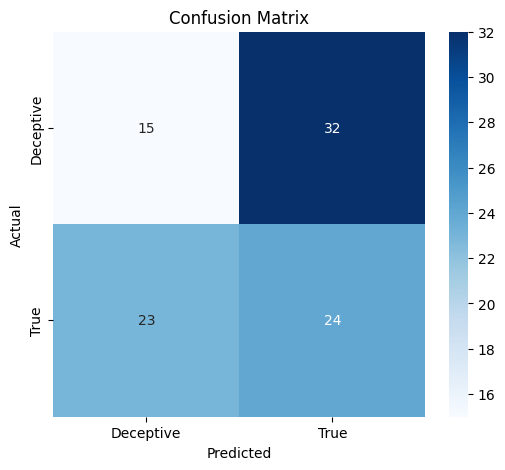

Classification Report (Test):
              precision    recall  f1-score   support

   Deceptive       0.39      0.32      0.35        47
        True       0.43      0.51      0.47        47

    accuracy                           0.41        94
   macro avg       0.41      0.41      0.41        94
weighted avg       0.41      0.41      0.41        94

Accuracy (Test): 0.4149
ROC AUC Score (Test): 0.3857


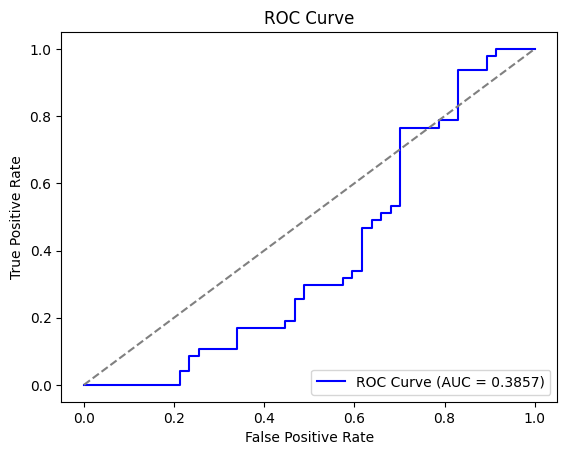

In [ ]:
display = False

train_csv = '/content/train_features.csv'
val_csv = '/content/test_features.csv'

train_data = pd.read_csv(train_csv)
val_data = pd.read_csv(val_csv)

    # Preprocess training and test data
X_train, y_train, feature_names, fitted_transformer = preprocess_data(train_data)
X_val, y_val, _, _ = preprocess_data(val_data, transformer=fitted_transformer)

if display:
    print('X_val:', X_val.shape)
    # Convert sparse matrix to dense array
    X_val_dense = X_val.toarray() if hasattr(X_val, "toarray") else X_val
    display(pd.DataFrame(X_val_dense, columns=feature_names))
    print('X_train:', X_train.shape)
    X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
    display(pd.DataFrame(X_train_dense, columns=feature_names))

# Train the model
model_name = 'svm'
trained_model = train_model(X_train, y_train, model_name=model_name)

# Evaluate the model
evaluate_model(trained_model, X_val, y_val, feature_names=feature_names)

The training set achieved an accuracy of 79.47% and an ROC AUC of 0.8845, indicating good performance on the training data. However, on the test set, the model only achieved an accuracy of 41.49% and an ROC AUC of 0.3857, suggesting significant difficulty in effectively predicting the two classes. The disparity between the high training metrics and poor validation performance indicates that the model is likely overfitting to the training data.

While SMOTE was used to balance the training data, further hyperparameter tuning or feature engineering may be required to improve generalization. Additionally, the current SVM configuration (RBF kernel, C=10, gamma=scale) appears insufficient to handle the complexity of the validation data.

## 6.4 Random Forest Main script

Class distribution before SMOTE: Counter({1: 190, 0: 174})
Class distribution after SMOTE: Counter({0: 190, 1: 190})
Training random_forest...
Best parameters for random_forest: {'max_depth': None, 'n_estimators': 50}
Training Metrics:
Accuracy: 1.0000
ROC AUC: 1.0000
Classification Report (Training):
              precision    recall  f1-score   support

   Deceptive       1.00      1.00      1.00       190
        True       1.00      1.00      1.00       190

    accuracy                           1.00       380
   macro avg       1.00      1.00      1.00       380
weighted avg       1.00      1.00      1.00       380

Confusion Matrix:
[[19 28]
 [26 21]]


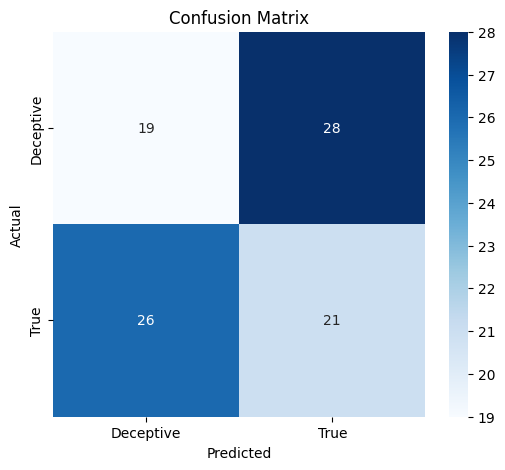

Classification Report (Test):
              precision    recall  f1-score   support

   Deceptive       0.42      0.40      0.41        47
        True       0.43      0.45      0.44        47

    accuracy                           0.43        94
   macro avg       0.43      0.43      0.43        94
weighted avg       0.43      0.43      0.43        94

Accuracy (Test): 0.4255
ROC AUC Score (Test): 0.4009


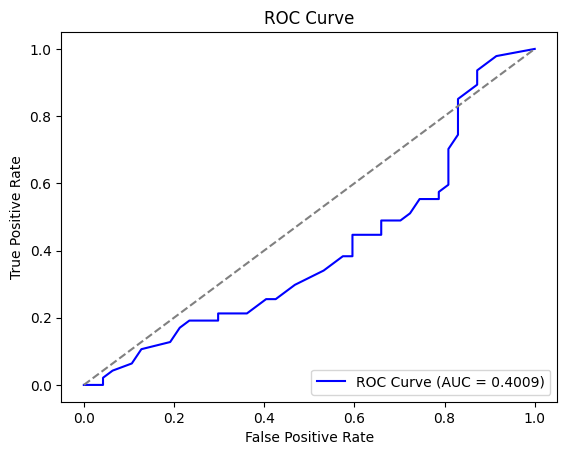

Feature Importance:
                       Feature  Importance
0                        power    0.259022
3                    voiced_fr    0.211546
1                   pitch_mean    0.194826
2                    pitch_std    0.187905
8             Language_English    0.027607
5             Language_Bengali    0.015962
10              Language_Hindi    0.015032
9              Language_French    0.014021
13             Language_Korean    0.009402
19             Language_Telugu    0.008578
7   Language_Chinese, Mandarin    0.007464
4              Language_Arabic    0.007397
18           Language_Swahilli    0.006737
12            Language_Kannada    0.006360
17            Language_Spanish    0.006104
6           Language_Cantonese    0.005831
15         Language_Portuguese    0.005312
14            Language_Marathi    0.005246
16            Language_Russian    0.003235
11            Language_Italian    0.002413


In [ ]:
display = False

train_csv = '/content/train_features.csv'
val_csv = '/content/test_features.csv'

train_data = pd.read_csv(train_csv)
val_data = pd.read_csv(val_csv)

    # Preprocess training and test data
X_train, y_train, feature_names, fitted_transformer = preprocess_data(train_data)
X_val, y_val, _, _ = preprocess_data(val_data, transformer=fitted_transformer)

if display:
    print('X_val:', X_val.shape)
    # Convert sparse matrix to dense array
    X_val_dense = X_val.toarray() if hasattr(X_val, "toarray") else X_val
    display(pd.DataFrame(X_val_dense, columns=feature_names))
    print('X_train:', X_train.shape)
    X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
    display(pd.DataFrame(X_train_dense, columns=feature_names))

# Train the model
model_name = 'random_forest'
trained_model = train_model(X_train, y_train, model_name=model_name)

# Evaluate the model
evaluate_model(trained_model, X_val, y_val, feature_names=feature_names)

## 6.5 LGBM Main script

Class distribution before SMOTE: Counter({1: 190, 0: 174})
Class distribution after SMOTE: Counter({0: 190, 1: 190})
Training lightgbm...
[LightGBM] [Info] Number of positive: 190, number of negative: 190
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 380, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

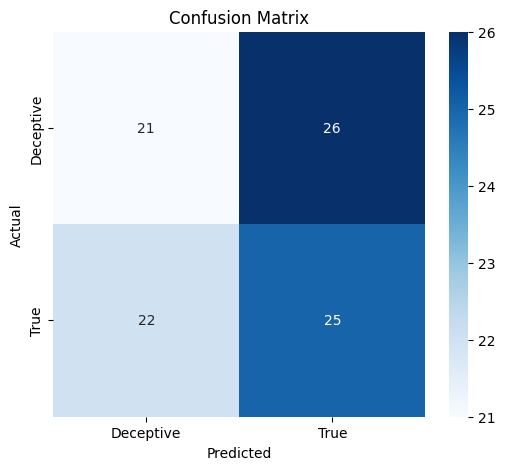

Classification Report (Test):
              precision    recall  f1-score   support

   Deceptive       0.49      0.45      0.47        47
        True       0.49      0.53      0.51        47

    accuracy                           0.49        94
   macro avg       0.49      0.49      0.49        94
weighted avg       0.49      0.49      0.49        94

Accuracy (Test): 0.4894
ROC AUC Score (Test): 0.5020


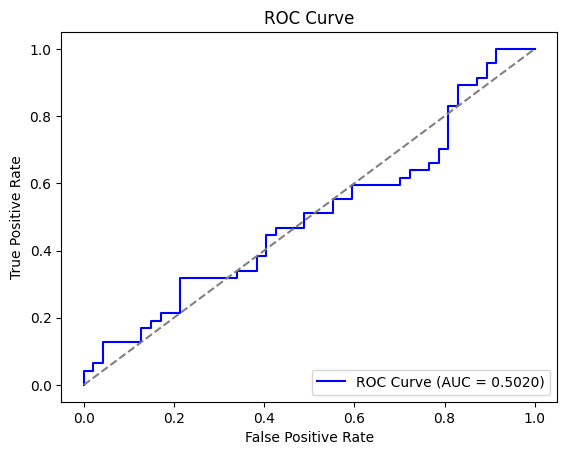

Feature Importance:
                       Feature  Importance
0                        power         825
3                    voiced_fr         752
1                   pitch_mean         638
2                    pitch_std         637
8             Language_English          85
12            Language_Kannada           0
18           Language_Swahilli           0
17            Language_Spanish           0
16            Language_Russian           0
15         Language_Portuguese           0
14            Language_Marathi           0
13             Language_Korean           0
10              Language_Hindi           0
11            Language_Italian           0
9              Language_French           0
7   Language_Chinese, Mandarin           0
6           Language_Cantonese           0
5             Language_Bengali           0
4              Language_Arabic           0
19             Language_Telugu           0


In [ ]:
display = False

train_csv = '/content/train_features.csv'
val_csv = '/content/test_features.csv'

train_data = pd.read_csv(train_csv)
val_data = pd.read_csv(val_csv)

    # Preprocess training and test data
X_train, y_train, feature_names, fitted_transformer = preprocess_data(train_data)
X_val, y_val, _, _ = preprocess_data(val_data, transformer=fitted_transformer)

if display:
    print('X_val:', X_val.shape)
    # Convert sparse matrix to dense array
    X_val_dense = X_val.toarray() if hasattr(X_val, "toarray") else X_val
    display(pd.DataFrame(X_val_dense, columns=feature_names))
    print('X_train:', X_train.shape)
    X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
    display(pd.DataFrame(X_train_dense, columns=feature_names))

# Train the model
model_name = 'lightgbm'
trained_model = train_model(X_train, y_train, model_name=model_name)

# Evaluate the model
evaluate_model(trained_model, X_val, y_val, feature_names=feature_names)

## 6.4 Further Analysis

### 6.4.1 Use only numerical features

**Rationale for Using Only Numerical Features (Excluding One-Hot Encoding of Language):**

To further evaluate the model's performance, an additional experiment was conducted by excluding the one-hot encoding of language and retaining only the numerical features. The aim was to determine whether language-related features significantly contributed to the model's predictive power. However, the results indicated that the model still suffered from overfitting, struggling to generalize effectively. This suggests that the inclusion of language features does not provide meaningful improvements to the model's predictive capabilities in this context.

X_train: [1.65278645e-03 7.23803467e+01 1.08263536e+01 4.80263158e-01]
X_val: [5.82891336e-05 1.03291995e+02 2.33517979e+01 6.14164087e-01]
Class distribution before SMOTE: Counter({1: 190, 0: 174})
Class distribution after SMOTE: Counter({0: 190, 1: 190})
Training svm...
Best parameters for svm: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Training Metrics:
Accuracy: 0.5658
ROC AUC: 0.6314
Classification Report (Training):
              precision    recall  f1-score   support

   Deceptive       0.59      0.45      0.51       190
        True       0.55      0.68      0.61       190

    accuracy                           0.57       380
   macro avg       0.57      0.57      0.56       380
weighted avg       0.57      0.57      0.56       380

Confusion Matrix:
[[19 28]
 [20 27]]


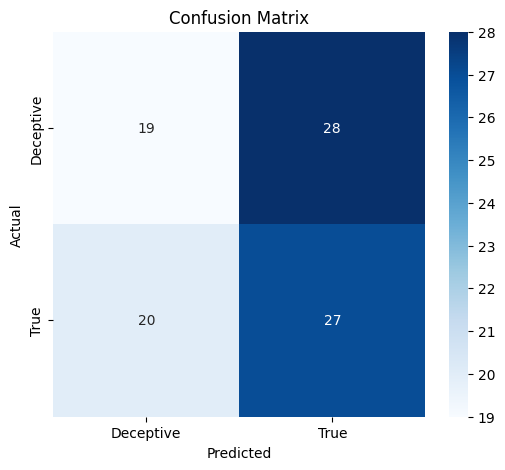

Classification Report (Test):
              precision    recall  f1-score   support

   Deceptive       0.49      0.40      0.44        47
        True       0.49      0.57      0.53        47

    accuracy                           0.49        94
   macro avg       0.49      0.49      0.49        94
weighted avg       0.49      0.49      0.49        94

Accuracy (Test): 0.4894
ROC AUC Score (Test): 0.5242


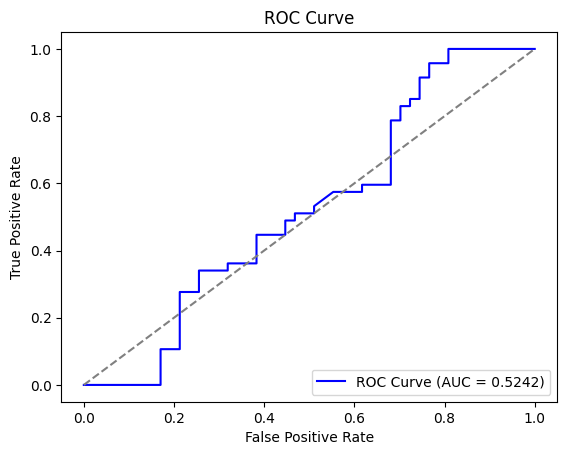

In [ ]:
# Step 1: Preprocess Data
def preprocess_data(data):
    """
    Preprocess the data using only numeric features.

    Args:
        data (pd.DataFrame): Input dataframe containing features

    Returns:
        tuple: (X_transformed, y, feature_names)
            - X_transformed: numpy array of processed features
            - y: target labels
            - feature_names: list of feature names
    """
    # Define numeric features
    NUMERIC_FEATURES = ['power', 'pitch_mean', 'pitch_std', 'voiced_fr']

    # Convert target labels
    data['Story_label'] = (data['Story_type'] == 'true_story').astype(int)

    # Prepare feature matrix and target
    X_transformed = data[NUMERIC_FEATURES].values
    y = data['Story_label']

    return X_transformed, y, NUMERIC_FEATURES

# Step 2: Handle Class Imbalance
def balance_data(X, y):
    print("Class distribution before SMOTE:", Counter(y))
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    print("Class distribution after SMOTE:", Counter(y_res))
    return X_res, y_res

# Step 3: Train and Evaluate Model

def train_model(X_train, y_train, model_name='random_forest'):
    """
    Train the model using GridSearchCV and return the best estimator along with training metrics.
    """
    # Handle class imbalance
    X_train_balanced, y_train_balanced = balance_data(X_train, y_train)

    # Models and parameters
    models = {
        'random_forest': RandomForestClassifier(random_state=42),
        'lightgbm': lgb.LGBMClassifier(random_state=42),
        'svm': SVC(random_state=42, probability=True)  # SVM with probability enabled for compatibility
    }
    params = {
        'random_forest': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20]
        },
        'lightgbm': {
            'num_leaves': [31, 40],
            'learning_rate': [0.1, 0.05],
            'n_estimators': [50, 100, 200]
        },
        'svm': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],  # Linear and RBF kernels
            'gamma': ['scale', 'auto']   # Kernel coefficient for RBF
        }
    }
    # Ensure selected model exists
    if model_name not in models:
        raise ValueError(f"Invalid model name: {model_name}. Choose from: {list(models.keys())}.")

    print(f"Training {model_name}...")
    grid = GridSearchCV(models[model_name], params[model_name], cv=3, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train_balanced, y_train_balanced)

    print(f"Best parameters for {model_name}: {grid.best_params_}")
    best_model = grid.best_estimator_

    # Evaluate on training data to check for overfitting
    y_train_pred = best_model.predict(X_train_balanced)
    y_train_pred_proba = best_model.predict_proba(X_train_balanced)[:, 1]
    train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
    train_roc_auc = roc_auc_score(y_train_balanced, y_train_pred_proba)

    print("Training Metrics:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"ROC AUC: {train_roc_auc:.4f}")
    print("Classification Report (Training):")
    print(classification_report(y_train_balanced, y_train_pred, target_names=['Deceptive', 'True']))

    return best_model


def evaluate_model(model, X_val, y_val, feature_names=None):
    """
    Evaluate the model on test data and report metrics.
    """
    # Predictions
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Deceptive', 'True'], yticklabels=['Deceptive', 'True'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Evaluation Metrics
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, target_names=['Deceptive', 'True'])
    print("Classification Report (Test):")
    print(report)
    print(f"Accuracy (Test): {accuracy:.4f}")

    # ROC AUC
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    print(f"ROC AUC Score (Test): {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Feature Importance
    if hasattr(model, 'feature_importances_') and feature_names:
        importances = model.feature_importances_
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        print("Feature Importance:")
        print(feature_importance)


# Main Script
if __name__ == "__main__":
    train_csv = '/content/train_features.csv'
    val_csv = '/content/test_features.csv'

    train_data = pd.read_csv(train_csv)
    val_data = pd.read_csv(val_csv)

    # Preprocess training and test data
    X_train, y_train, feature_names = preprocess_data(train_data)
    X_val, y_val, _= preprocess_data(val_data)
    print('X_train:', X_train[1])
    print('X_val:', X_val[1])
    # Train the model
    model_name = 'svm'
    trained_model = train_model(X_train, y_train, model_name=model_name)

    # Evaluate the model
    evaluate_model(trained_model, X_val, y_val, feature_names=feature_names)

### 6.4.2 Use dummy data

**Rationale for Using Dummy Data:**

The use of dummy data, or mock data, was introduced as a method to further investigate the role of the extracted features in the model's performance. The intention was to determine whether the features themselves were meaningful or simply random noise. The results showed that the model’s performance on dummy data was identical to its performance on real extracted features, both demonstrating overfitting. This outcome suggests that the features used in both cases were essentially irrelevant to the true or deceptive labels, essentially acting as random numbers without any real relationship to the task. Overfitting occurred because the model, particularly with its high complexity (e.g., Random Forest), was able to fit all the data in both cases, resulting in a model that does not generalize beyond the training set.

Class distribution before SMOTE: Counter({0: 165, 1: 145})
Class distribution after SMOTE: Counter({0: 165, 1: 165})
Training random_forest...
Best parameters for random_forest: {'max_depth': 10, 'n_estimators': 50}
Training Metrics:
Accuracy: 1.0000
ROC AUC: 1.0000
Classification Report (Training):
              precision    recall  f1-score   support

   Deceptive       1.00      1.00      1.00       165
        True       1.00      1.00      1.00       165

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330

Confusion Matrix:
[[72 70]
 [80 88]]


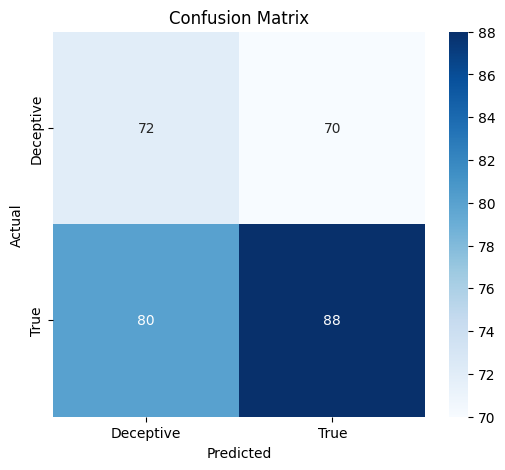

Classification Report (Test):
              precision    recall  f1-score   support

   Deceptive       0.47      0.51      0.49       142
        True       0.56      0.52      0.54       168

    accuracy                           0.52       310
   macro avg       0.52      0.52      0.51       310
weighted avg       0.52      0.52      0.52       310

Accuracy (Test): 0.5161
ROC AUC Score (Test): 0.5333


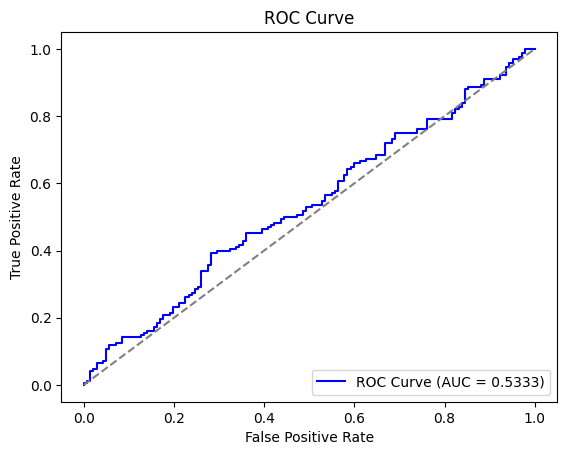

Feature Importance:
      Feature  Importance
2   pitch_std    0.271011
0       power    0.249003
3   voiced_fr    0.246502
1  pitch_mean    0.233483


In [ ]:
# Dummy data
def generate_dummy_data(dataset_type):
    # np.random.seed(41)  # For reproducibility
    data = [
        {'file_name': f'{dataset_type}_000{i:02d}_segment_1.wav',
         'power': np.random.uniform(0.0001, 0.001),
         'pitch_mean': np.random.uniform(90, 120),
         'pitch_std': np.random.uniform(30, 60),
         'voiced_fr': np.random.uniform(0.5, 1),
         'Language': np.random.choice(['English', 'Hindi']),
         'Story_type': np.random.choice(['true_story', 'deceptive_story'])}
        for i in range(1, 311)
    ]
    return pd.DataFrame(data)

# Step 1: Preprocess Data
def preprocess_data(data):
    """
    Preprocess the data using only numeric features.

    Args:
        data (pd.DataFrame): Input dataframe containing features

    Returns:
        tuple: (X_transformed, y, feature_names)
            - X_transformed: numpy array of processed features
            - y: target labels
            - feature_names: list of feature names
    """
    # Define numeric features
    NUMERIC_FEATURES = ['power', 'pitch_mean', 'pitch_std', 'voiced_fr']

    # Convert target labels
    data['Story_label'] = (data['Story_type'] == 'true_story').astype(int)

    # Prepare feature matrix and target
    X_transformed = data[NUMERIC_FEATURES].values
    y = data['Story_label']

    return X_transformed, y, NUMERIC_FEATURES

# Step 2: Handle Class Imbalance
def balance_data(X, y):
    print("Class distribution before SMOTE:", Counter(y))
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    print("Class distribution after SMOTE:", Counter(y_res))
    return X_res, y_res

# Step 3: Train and Evaluate Model

def train_model(X_train, y_train, model_name='random_forest'):
    """
    Train the model using GridSearchCV and return the best estimator along with training metrics.
    """
    # Handle class imbalance
    X_train_balanced, y_train_balanced = balance_data(X_train, y_train)

    # Models and parameters
    models = {
        'random_forest': RandomForestClassifier(random_state=42),
        'lightgbm': lgb.LGBMClassifier(random_state=42)
    }
    params = {
        'random_forest': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10]
        },
        'lightgbm': {
            'num_leaves': [31, 40],
            'learning_rate': [0.1, 0.05],
            'n_estimators': [50, 100, 200]
        }
    }

    # Ensure selected model exists
    if model_name not in models:
        raise ValueError(f"Invalid model name: {model_name}. Choose from: {list(models.keys())}.")

    print(f"Training {model_name}...")
    grid = GridSearchCV(models[model_name], params[model_name], cv=3, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train_balanced, y_train_balanced)

    print(f"Best parameters for {model_name}: {grid.best_params_}")
    best_model = grid.best_estimator_

    # Evaluate on training data to check for overfitting
    y_train_pred = best_model.predict(X_train_balanced)
    y_train_pred_proba = best_model.predict_proba(X_train_balanced)[:, 1]
    train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
    train_roc_auc = roc_auc_score(y_train_balanced, y_train_pred_proba)

    print("Training Metrics:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"ROC AUC: {train_roc_auc:.4f}")
    print("Classification Report (Training):")
    print(classification_report(y_train_balanced, y_train_pred, target_names=['Deceptive', 'True']))

    return best_model


def evaluate_model(model, X_test, y_test, feature_names=None):
    """
    Evaluate the model on test data and report metrics.
    """
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Deceptive', 'True'], yticklabels=['Deceptive', 'True'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Deceptive', 'True'])
    print("Classification Report (Test):")
    print(report)
    print(f"Accuracy (Test): {accuracy:.4f}")

    # ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score (Test): {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Feature Importance
    if hasattr(model, 'feature_importances_') and feature_names:
        importances = model.feature_importances_
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        print("Feature Importance:")
        print(feature_importance)


# Main Script
if __name__ == "__main__":
    train_csv = '/content/train_features.csv'
    test_csv = '/content/test_features.csv'

    train_data = generate_dummy_data('train')
    test_data = generate_dummy_data('test')

    # Preprocess training and test data
    X_train, y_train, feature_names = preprocess_data(train_data)
    X_test, y_test, _= preprocess_data(test_data)

    # Train the model
    model_name = 'random_forest'  # Change to 'lightgbm' if desired
    trained_model = train_model(X_train, y_train, model_name=model_name)

    # Evaluate the model
    evaluate_model(trained_model, X_test, y_test, feature_names=feature_names)

# 7 Conclusions and Recommendatons

## 7.1 Conclusion

This study processed the initial dataset into normalized 30-second audio clips of truthful or deceptive narratives and extracted four representative acoustic features for analysis. Despite leveraging machine learning models such as SVM, Random Forest, and LightGBM, the prediction accuracy for all models fell below 50%, with Random Forest and LightGBM showing signs of overfitting. These results highlight a key limitation: the extracted numerical acoustic features alone are insufficient for accurately detecting deceptive behavior.  

Lie detection is inherently complex, requiring richer and more diverse data sources, such as physiological signals (e.g., facial expressions, heart rate, brainwave activity) and contextual knowledge. Without integrating such comprehensive data, the model risks overfitting to irrelevant patterns and fails to capture meaningful insights. This underscores the limitations of relying solely on simple numerical features for addressing a multifaceted challenge like lie detection.


## 7.2 Suggestions for Improvements

The report identifies several limitations, and the following recommendations aim to enhance the performance and robustness of the machine learning pipeline while guiding future research in deception detection.

* **Advanced modeling techniques** should include exploring deep learning methods optimized for acoustic signal analysis, such as Convolutional Neural Networks (CNNs) and Transformer-based models like Wav2Vec. These approaches can capture temporal and contextual patterns more effectively. Additionally, leveraging large language models like BERT or GPT to extract semantic and lexical features from audio transcriptions could significantly boost predictive accuracy.
* **Enhancing the dataset** is essential. Incorporating lexical features, such as sentiment and linguistic cues, can add depth to the analysis. Employing audio augmentation techniques, including pitch shifting and noise injection, can increase sample variability. Generative models can also be used to create synthetic data, balancing classes and enriching the dataset’s diversity.
* **Cross-validation** using techniques like k-fold splitting ensures a robust evaluation of the model’s performance, minimizing overfitting and dependency on specific dataset splits. This approach provides a clearer understanding of the model’s generalization ability.
* **Exploring transfer learning and cross-language generalization** opens avenues for assessing whether a model trained in one language can effectively predict deception in another. Developing multilingual models and testing their zero-shot or few-shot capabilities can uncover insights into cross-linguistic patterns and the broader applicability of deception detection systems.
* **Fairness analysis** is crucial to identifying and mitigating biases in model predictions across demographic groups, such as gender, age, and language. Addressing these disparities will ensure the model performs equitably across diverse populations, enhancing its reliability and acceptance in real-world applications.
* **Future research directions** could focus on combining multimodal data, such as integrating acoustic, visual, and textual features, to create a more holistic deception detection system. Additionally, prioritizing interpretability and real-time deployment can make these models more practical and impactful in dynamic, real-world scenarios.

# 8. References

1. **Python Libraries:**  
   - [pydub](https://github.com/jiaaro/pydub): A Python library for audio manipulation and format conversion.  
   - [librosa](https://librosa.org/): A Python package for music and audio analysis, particularly useful for feature extraction like MFCC and pitch.  
   - [scikit-learn](https://scikit-learn.org/stable/): A widely-used machine learning library for classification, regression, and clustering tasks.  
   - [imbalanced-learn](https://imbalanced-learn.org/stable/): A Python toolbox for handling imbalanced datasets using techniques like SMOTE.  
   - [lightgbm](https://lightgbm.readthedocs.io/): A gradient boosting framework that uses tree-based learning algorithms for efficient and scalable model training.  
   - [tqdm](https://tqdm.github.io/): A library for creating progress bars, enhancing workflow efficiency during iterative processes.  
   - [IPython](https://ipython.org/): Provides tools for interactive computing, such as inline display of audio files.  
   - [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/): Visualization libraries used to create plots and charts for exploratory data analysis.  
   - [NumPy](https://numpy.org/): A fundamental package for numerical computing in Python, supporting array operations.  
   - [Pandas](https://pandas.pydata.org/): A data manipulation and analysis library for structured data, essential for DataFrame operations.  
   - [shutil](https://docs.python.org/3/library/shutil.html): A Python library for high-level file operations, used here for organizing files.  

2. **Dataset Source:**  
   - MLEnd Deception Dataset: [GitHub Repository](https://github.com/MLEndDatasets/Deception).  

3. **Oversampling Techniques:**  
   - [SMOTE (Synthetic Minority Oversampling Technique)](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html): Applied to balance the class distribution.  


4. **Articles**

  1. Ekman, P., Sullivan, M., Friesen, W., & Scherer, K. (1991). Face, voice, and body in detecting deception. *Journal of Nonverbal Behaviour, 15*(2), 125–135.  
  2. Reid, J. E., & Associates. (2000). *The Reid Technique of Interviewing and Interrogation.* Chicago: Reid, John E. and Associates, Inc.  
  3. Adams, S. H. (1996). Statement analysis: What do suspects’ words really reveal? *FBI Law Enforcement Bulletin,* October.  
  4. Hirschberg, J., Benus, S., Brenier, J. M., Enos, F., Friedman, S., Gilman, S., Girand, C., Graciarena, M., Kathol, A., Michaelis, L., Pellom, B. L., Shriberg, E., & Stolcke, A. (2005). Distinguishing deceptive from non-deceptive speech. *Proc. Interspeech 2005*, 1833-1836. doi: 10.21437/Interspeech.2005-580.